# Course project - Mykhailo Manukian

## Problem statement: 

- Conduct a research to investigate which skills and knowledge required to pursue a successful career in Data Science path.
- Propose changes for curriculum of course "Introduction to Data Science and Analytics" and “Master of Data Science” program at Ukrainian Catholic University.

To answer questions posted above our team decided to collect and analyze data with focus on USA country or data not related to location(MOOC for example). The reason to choose USA as representative region are following:
- We could assume USA as frontrunner in area of Data Science due to high amount of high-tech companies and specialized Universities;
- Within kaggle ML and Data Science Survey majority of answers were given by respondends from USA country;
- By analyzing kaggle ML and Data Science Survey dataset we come to conclussion that trends derived from USA data subset quite simillar comparing to other countries data subset. (This analysis were done by teammate Andrii and not included into my own noebook)

In a nutshell, USA country data looks like representative sample to explore worlwide trends. Hence, I limited my analysis by this location only.

## Data preparation

Importing liblraries we need for data processing and visualizations

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import matplotlib.ticker as mtick
# sns.set()

Loading data with vacancies from four different sources - headhunter.com, glassdoor.com, monster.com and indeed.com. Data source for glassdoor.com was collected by teammate Elizaveta, data source for indeed.com colelcted by teammate Natalia, other data sources were collected on my own. Data collection were done in separate notebooks which are submitted with this one.

Since all data sources has own labels and different structure I will need to perform some renaming and will take only subsets of data. As a final step I am removing any duplicates which could slip through during data collection.

In [2]:
monster_ds = pd.read_csv('https://raw.githubusercontent.com/kai-wren/Intro2DS/master/Monster_job_vacancies.csv')
# monster_ds = pd.read_csv('Monster_job_vacancies.csv')

hh_ds_full = pd.read_csv('https://raw.githubusercontent.com/kai-wren/Intro2DS/master/Headhunters_job_vacancies.csv')
# hh_ds_full = pd.read_csv('Headhunters_job_vacancies.csv')

hh_ds = hh_ds_full[['Job_Title', 'Company_Name', 'Location', 'Job_ID', 'Job_Description', 'Link', 'Compensation']]

glassdoor_ds_full = pd.read_csv('https://raw.githubusercontent.com/kai-wren/Intro2DS/master/glassdoor_new.tsv', 
                          delimiter='\t',encoding='utf-8')
# glassdoor_ds_full = pd.read_csv('glassdoor_new.tsv', delimiter='\t',encoding='utf-8')

glassdoor_ds_full = glassdoor_ds_full.rename(columns={'description_text': 'Job_Description', 
                                                    'salary': 'Compensation', 'job_title': 'Job_Title',
                                                    'company': 'Company_Name', 'location': 'Location'})

glassdoor_ds = glassdoor_ds_full[['Job_Title', 'Company_Name', 'Location', 'Job_Description', 'Compensation']]

indeed_ds_full = pd.read_csv('https://raw.githubusercontent.com/kai-wren/Intro2DS/master/data_incl.5523_vacancies.csv')
# indeed_ds_full = pd.read_csv('data_incl.5523_vacancies.csv')

indeed_ds_full = indeed_ds_full.rename(columns={'Summary': 'Job_Description', 'Salary': 'Compensation', 
                                                'Title': 'Job_Title', 'Company': 'Company_Name'})

indeed_ds = indeed_ds_full[['Job_Title', 'Company_Name', 'Location', 'Job_Description', 'Compensation']]

frames = [monster_ds, hh_ds, glassdoor_ds, indeed_ds]
job_ds = pd.concat(frames, sort=False)
job_ds.drop_duplicates()
job_ds.head()

,Unnamed: 0,Job_Title,Company_Name,Location,Job_ID,Job_Description,Link,Compensation
0,0.0,Junior Data Scientist - NYC,Visionaire Partners,"Manhattan, NY 10001",213759799,\nData Scientist - NYCExciting opportunity to ...,https://job-openings.monster.com/junior-data-s...,DOE
1,1.0,Data Scientist,National Debt Relief,"New York City, NY 10038",213099686,\nWho We’re Looking For:National Debt Relief (...,https://job-openings.monster.com/data-scientis...,NaN
2,2.0,Data Scientist (NYC),Interactive Brokers LLC,"New York, NY",213764166,\nJob Description and ResponsibilitiesInteract...,https://job-openings.monster.com/data-scientis...,NaN
3,3.0,Head of Data Science Discovery,Facebook,"New York, NY",be31d872-e8b3-47dc-9033-76140bcebe27,\nCompany is a global community of more than 1...,https://job-openings.monster.com/head-of-data-...,NaN
4,4.0,Product Manager,Apex Systems,"New York, NY",213794635,\n Job Description Job #: 1016957••Please sen...,https://job-openings.monster.com/product-manag...,NaN


Loading datasets for different online courses from Coursera, Udemy and edX. Datasets provided by team mates Elizaveta and Kateryna. Since all data sources has own labels and different structure I will need to perform some renaming. As a final step I am removing any duplicates which could slip through during data collection.

In [3]:
coursera_ds = pd.read_csv('https://raw.githubusercontent.com/kai-wren/Intro2DS/master/courses%20-%20cousera_cleaned_skills.csv', 
                        header=None)
# coursera_ds = pd.read_csv('courses - cousera_cleaned_skills.csv', 
#                         header=None)

coursera_ds = coursera_ds.rename(columns={0: 'Course Name', 1: 'Rating', 2: 'Provider', 3: 'Skills', 4: 'Link'})

udemy_ds = pd.read_csv('https://raw.githubusercontent.com/kai-wren/Intro2DS/master/courses%20-%20udemy_courses%20(1).csv', 
                      header=None)
# udemy_ds = pd.read_csv('courses - udemy_courses (1).csv', 
#                       header=None)

udemy_ds = udemy_ds.rename(columns={0: 'Link', 1: 'Skills', 2: 'Course Name', 3: 'Rating'})

edx_ds = pd.read_csv('https://raw.githubusercontent.com/kai-wren/Intro2DS/master/courses%20-%20edx_courses.csv')
# edx_ds = pd.read_csv('courses - edx_courses.csv')

edx_ds = edx_ds.rename(columns={'url': 'Link', 'name': 'Course Name', 'Organization': 'Provider', 
                                'About this course': 'Skills', 'What you\'ll learn': 'Additional skills'})

frames = [coursera_ds, udemy_ds, edx_ds]
courses_ds = pd.concat(frames, sort=False)
courses_ds = courses_ds.drop_duplicates() #dropping duplicates since those are exist in some datasets
courses_ds.drop_duplicates()
courses_ds.head()

,Course Name,Rating,Provider,Skills,Link,Subject,Additional skills,Syllabus
0,Machine Learning,4.9,Stanford University,"Logistic Regression, Artificial Neural Network...",https://www.coursera.org/learn/machine-learning,NaN,NaN,NaN
1,Neural Networks and Deep Learning,4.9,deeplearning.ai,"Artificial Neural Network, Backpropagation, Py...",https://www.coursera.org/learn/neural-networks...,NaN,NaN,NaN
2,Introduction to Data Science in Python,4.5,University of Michigan,"Python Programming, Numpy, Pandas, Data Cleansing",https://www.coursera.org/learn/python-data-ana...,NaN,NaN,NaN
3,Convolutional Neural Networks,4.9,deeplearning.ai,"Facial Recognition System, Tensorflow, Convolu...",https://www.coursera.org/learn/convolutional-n...,NaN,NaN,NaN
4,Improving Deep Neural Networks: Hyperparameter...,4.9,deeplearning.ai,"Hyperparameter, Tensorflow, Hyperparameter Opt...",https://www.coursera.org/learn/deep-neural-net...,NaN,NaN,NaN


Defining here some auxilary methods to be used later:
- get_skills - method used to retrieve on the fly skills from job vacancies description based on parameter with skills keywords;
- prepare_skills - method to return list of skills kewords based on topic passed. It basically contains some hardcode and used to reduce number of hardcode in other places;

In [37]:
def get_skills (source, skills):   
    result = {}
    for skill in skills:
        result[skill] = []

    for item in source:
        for skill in skills:
            if  skill == 'R ':
                if skill in item:
                    result[skill].append('1') 
                else:
                    result[skill].append('0')
            else:
                if any(term in item.lower() for term in skills[skill]):
                    result[skill].append('1') 
                else:
                    result[skill].append('0')

    return result

def prepare_skills (key):
    skills = {}
    
    if key == 'prog_lang':
        skills['Python'] = ['python']
        skills['C++'] = ['c++']
        skills['Go'] = [' go ']
        skills['Java']=['java ']
        skills['Javascript']=['javascript']
        skills['MATLAB'] = ['matlab']
        skills['R '] = ['R ']
        skills['SAS'] = ['sas']
        skills['SQL'] = ['sql']
        skills['Scala'] = ['scala']
        skills['VBA'] = ['vba']
    
    if key == 'soft_skills':
        skills['Communications'] = ['communication', 'listening', 'constructive feedback', 'friendliness', 'empathy']
        skills['Team Player'] = ['team work', 'team spirit', 'team member', 'team player', 'teamwork', 
                                 'conflict management', 'conflict handling', 'conflict resolution', 'delegation', 
                                 'collaboration', 'cooperation', 'negotiating', 'negotiation', 'idea exchange']
        skills['Adaptability'] = ['adaptability', 'curiosity', 'decision-making', 'decision making', 'optimism', 
                                 'open-mindedness', 'open mind', 'open-mind', 'self-confidence', 'self-motivation',
                                 'self confidence', 'self motivation']
        skills['Problem-Solving'] = ['problem-solving', 'problem solving', 'brainstorming', 'observation', 
                                    'persistence', 'lateral thinking']
        skills['Creativity'] = ['divergent thinking', 'imagination', 'mind mapping', 'innovation', 'experimenting',
                               'creativity']
        skills['Work Ethic'] = ['discipline', 'commitment', 'professionalism', 'responsibility', 'work ethic']
        skills['Interpersonal Skills'] = ['mentoring', 'networking', 'tolerance', 'patience', 'diplomacy']
        skills['Time Management']=['goal setting', 'prioritizing', 'prioritization', 'stress management', 'coping', 
                                  'time management', 'planning', 'planner']
        skills['Self Improvement'] = ['self-improvement', 'personal development', 'self-education', 'self improvement',
                                     'self education']
        skills['Presentation'] = ['presentation', 'public speaking']
        skills['Critical Thinking'] = ['critical thinking']
        skills['Business Understanding'] = ['business understanding', 'understand business']
        skills['Leadership'] = ['leadership', 'project management', 'selflessness', 'agility', 'cultural intelligence', 
                               'authenticity', 'trust']
        skills['People Management'] = ['people management', 'resources management', 'resource management']
        
#         skills[''] = ['']
    
    if key == 'DS_algo':
        skills['Regression'] = ['linear regression', 'logistic regression', 'jackknife regression']
        skills['Density Estimation'] = ['density estimation']
        skills['Confidence Interval'] = ['confidence interval']
        skills['Hypotheses testing'] = ['test of hypotheses', 'hypothesis testing']
        skills['Pattern Recognition'] = ['pattern recognition']
        skills['Clustering'] = ['clustering']
        skills['Time Series'] = ['time series']
        skills['Decision Trees'] = ['decision tree']
        skills['Random Numbers'] = ['random numbers']
        skills['Monte-Carlo Simulation'] = ['monte-carlo simulation', 'monte-carlo', 'carlo']
        skills['Bayesian Statistics'] = ['bayesian statistics', 'bayes', 'bayesian method', 'naive bayes']
        skills['PCA'] = ['principal component analysis', 'pca']
        skills['Ensembles'] = ['ensembles']
        skills['Neural Networks'] = ['neural networks', 'neural']
        skills['Supervised Learning'] = ['supervised learning', 'supervised']
        skills['SVM'] = ['support vector machine', 'support vector', 'svm']
        skills['Nearest Neighbors'] = ['nearest neighbors', 'k-nn']
        skills['Feature Selection'] = ['feature selection']
        skills['Indexation/Cataloguing'] = ['indexation', 'cataloguing']
        skills['Geo-Spatial Modeling'] = ['geo-spatial modeling', 'spatial modeling', 'geo-spatial', 'geo spatial']
        skills['Recommendation Engine'] = ['recommendation engine']
        skills['Search Engine'] = ['search engine']
        skills['Attribution Modeling'] = ['attribution modeling']
        skills['Collaborative Filtering'] = ['collaborative filtering']
        skills['Rule System'] = ['rule system', 'rules system']
        skills['Linkage Analysis'] = ['linkage analysis']
        skills['Association Rules'] = ['association rules']
        skills['Scoring Engine'] = ['scoring engine', 'scoring']
        skills['Segmentation'] = ['segmentation']
        skills['Predictive Modeling'] = ['predictive modeling']
        skills['Graphs'] = ['graphs', 'graph ']
        skills['Deep Learning'] = ['deep learning']
        skills['Game Theory'] = ['game theory']
        skills['Imputation'] = ['imputation']
        skills['Survival Analysis'] = ['survival analysis']
        skills['Arbitrage'] = ['arbitrage']
        skills['Lift Modeling'] = ['lift modeling', 'lift']
        skills['Yield Optimization'] = ['yield optimization']
        skills['Cross-Validation'] = ['cross-validation', 'cross validation']
        skills['Model Fitting'] = ['model fitting', 'fit to model', 'model fit']
        skills['Relevancy Algorithm'] = ['relevancy algorithm', 'relevancy']
        skills['Experimental Design'] = ['experimental design']
        
    if key == 'business_domain':
        skills['Insurance'] = ['insurance']
        skills['Banking'] = ['banking', 'finance']
        skills['Telco'] = ['telco', 'telecom', 'telecommunications']
        skills['Utilities'] = ['utilities']
        skills['Healthcare'] = ['healthcare', 'health']
        skills['Education'] = ['education']
        skills['Public Service'] = ['public service', 'government service', 'governmental service']
        skills['Travel & Hospitality'] = ['hospitality', 'travel']
        skills['Media & Entertainment'] = ['entertainment', ' media ']
        skills['Automotive'] = ['automotive']
        skills['Heavy Industry'] = ['heavy industry', 'industrial', 'machinery']
        skills['Information Technology'] = ['information technology']
        skills['Energy'] = ['energy', 'natural resource']
        skills['Life Science'] = ['life science']
        skills['Transportation'] = ['transportation', 'logistics', 'supply chain', 'supplychain']
        skills['E-Commerce'] = ['e-commerce', 'ecommerce']
        skills['Security'] = ['security']
        skills['Aerospace'] = ['aerospace', 'aero', 'space']
        
    if key == 'DS_tools':
        skills['Numpy'] = ['numpy']
        skills['Scipy'] = ['scipy']
        skills['Python'] = ['python']
        skills['R '] = ['R ']
        skills['SQL'] = [' sql']
        skills['Hadoop'] = ['hadoop']
        skills['Spark'] = ['spark']
        skills['Java']=['java ']
        skills['SAS'] = ['sas']
        skills['Tableau'] = ['tableau']
        skills['Hive'] = ['hive']
        skills['Scala'] = ['scala']
        skills['AWS'] = ['aws', 'amazon']
        skills['C++'] = ['c++']
        skills['MATLAB'] = ['matlab']
        skills['TensorFlow'] = ['tensorflow', 'tensor']
        skills['C'] = [' c ']
        skills['Excel'] = ['excel']
        skills['NoSQL'] = ['nosql']
        skills['Linux'] = ['linux']
        skills['Azure'] = ['azure']
        skills['Scikit-learn'] = ['scikit-learn', 'scikit learn', 'scikit']
        skills['SPSS'] = ['spss']
        skills['Pig'] = ['pig']
        skills['Pandas'] = ['pandas']
        skills['Javascript'] = ['javascript']
        skills['Perl'] = ['perl']
        skills['C#'] = ['c#']
        skills['Keras'] = ['keras']
        skills['Git'] = ['git']
        skills['Docker'] = ['docker']
        skills['MySQL'] = ['mysql']
        skills['Hbase'] = ['hbase']
        skills['MongoDB'] = ['mongodb']
        skills['Cassandra'] = ['cassandra']
        skills['PyTorch'] = ['pytorch']
        skills['D3'] = ['d3']
        skills['Caffe'] = ['caffe']
        skills['ggplot2'] = ['ggplot']
        skills['Altair'] = ['altair']
        skills['Plotly'] = ['plotly']
        skills['Matplotlib'] = ['matplotlib']
        skills['seaborn'] = ['seaborn']
        skills['XGBoost'] = ['xgboost']
        skills['Julia'] = ['julia']
        
    if key == 'ML_algo':
        skills['Regression'] = ['linear regression', 'logistical regression']
        skills['Random Forest'] = ['random forest', 'forest']
        skills['Gradient Boosted Trees'] = ['gradient boosted trees', 'gradient boosted', 'gradient boost']
        skills['SVM'] = ['Support Vector Machines', 'SVM']
        skills['Neural Networks'] = ['neural networks', 'neural']
        skills['Decision Trees'] = ['decision trees', 'decision tree', 'tree']
        skills['Naive Bayes;'] = ['naive bayes', 'naive', 'bayes']
        skills['Nearest Neighbor'] = ['nearest neighbor']
        skills['k-Means Clustering'] = ['k-means clustering', 'k-means', 'k means']
        skills['t-SNE'] = ['t-sne', 't-distributed stochastic neighbor embedding', 'stochastic neighbor embedding', 
                          'stochastic neighbor', 'neighbor embedding', 'stochastic embedding']
        skills['PCA'] = ['principal component analysis', 'pca', 'principal component']
        skills['Association rule'] = ['association rule']
        skills['Q-Learning'] = ['q-learning', 'q learning', 'q-learn', 'q learn']
        skills['Temporal Difference'] = ['temporal difference', ' td ']
        skills['Monte-Carlo Tree Search'] = ['monte-carlo tree search', 'mcts']
        skills['Asynchronous Actor-Critic Agents'] = ['asynchronous actor-critic agents', 'a3c', 'actor-critic']
#         skills['Supervised Learning'] = [' supervised learning', ' supervised']
#         skills['Unsupervised Learning'] = ['unsupervised learning', 'unsupervised']
#         skills['Reinforcement Learning'] = ['reinforcement learning', 'reinforcement', 'reinforce']
        
    if key == 'math':
        skills['Statistic'] = ['statistic', 'probability']
        skills['Linear Algebra'] = ['linear algebra', 'algebra']
        skills['Econometrics'] = ['econometrics', 'econome']
        skills['Mathematics'] = ['mathematics', ' math ']
        skills['Calculus'] = ['calculus']
        
#         skills[''] = ['']
        
    return skills

## Part 1 - Course curriculum design

### Processing and visualizing data

#### Job vacancies data set and DS methodologies skillset
Here I took list of Data Science methodologies and try to serach amongs all vacancies and count how many times certain methodology appears for given job offering. 

As next step I used simple bar chart to visualize which methodologies shows up in vacancies description more often than others.

Since certain skill does not appears at all, I am removing those from resulting data set. Also I decided that skills on the right hand side of bar chart are not representative enough and drop those from dataset for further analysis. Barcharts provided before and after fields were dropped. Drop criteria - mean of column is less than 0.003.

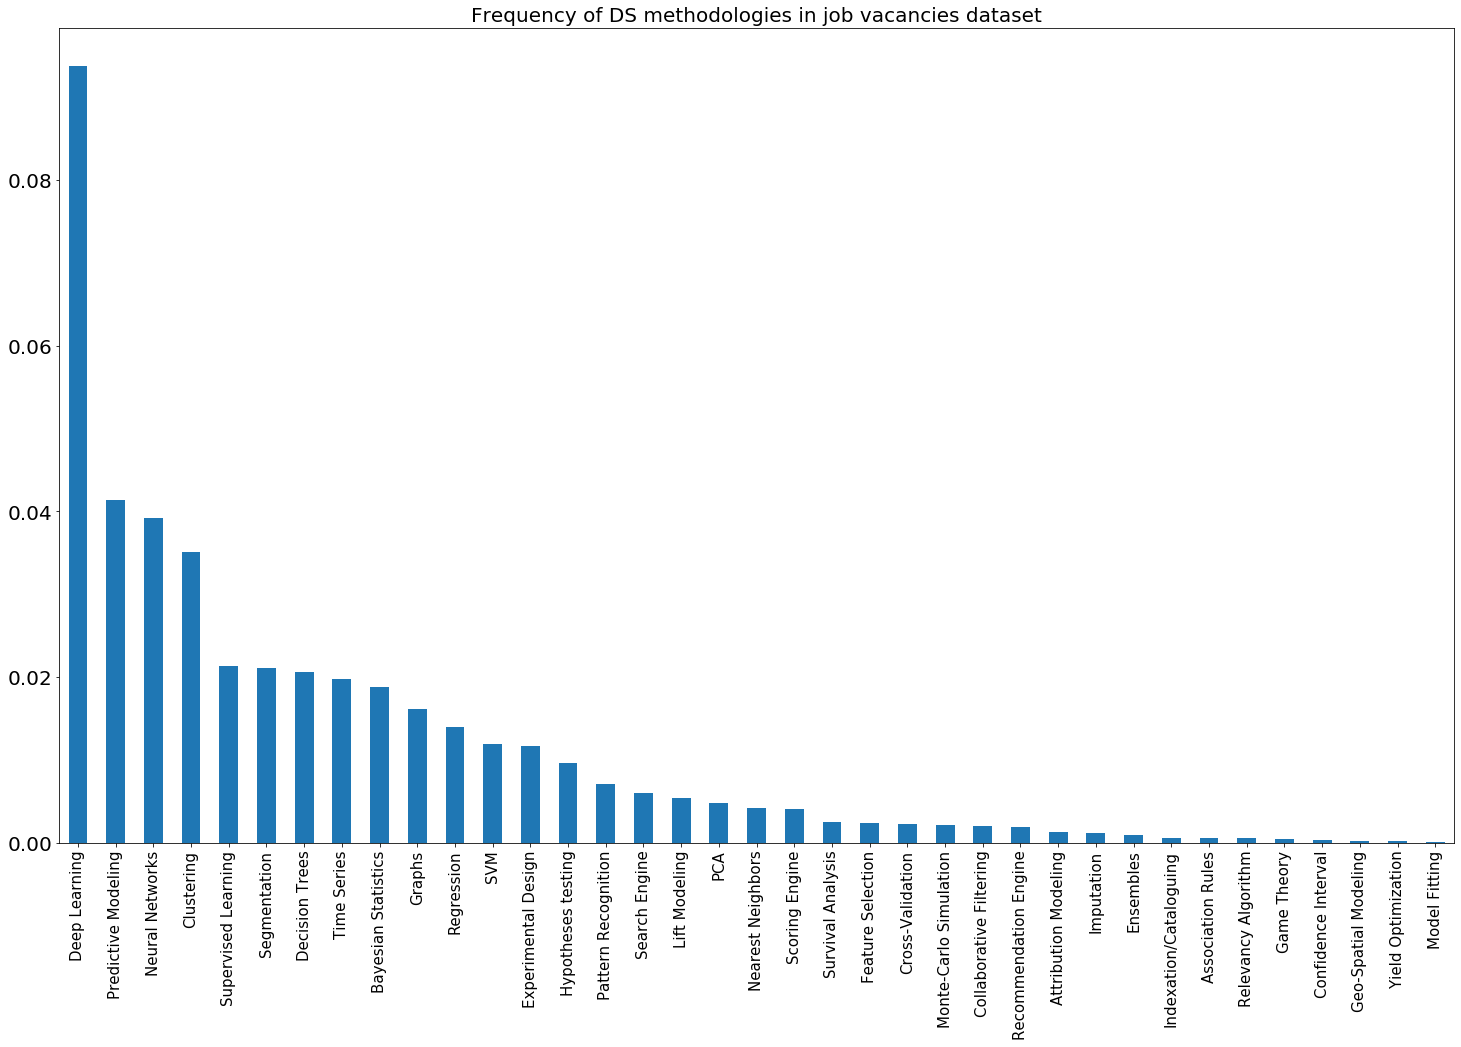

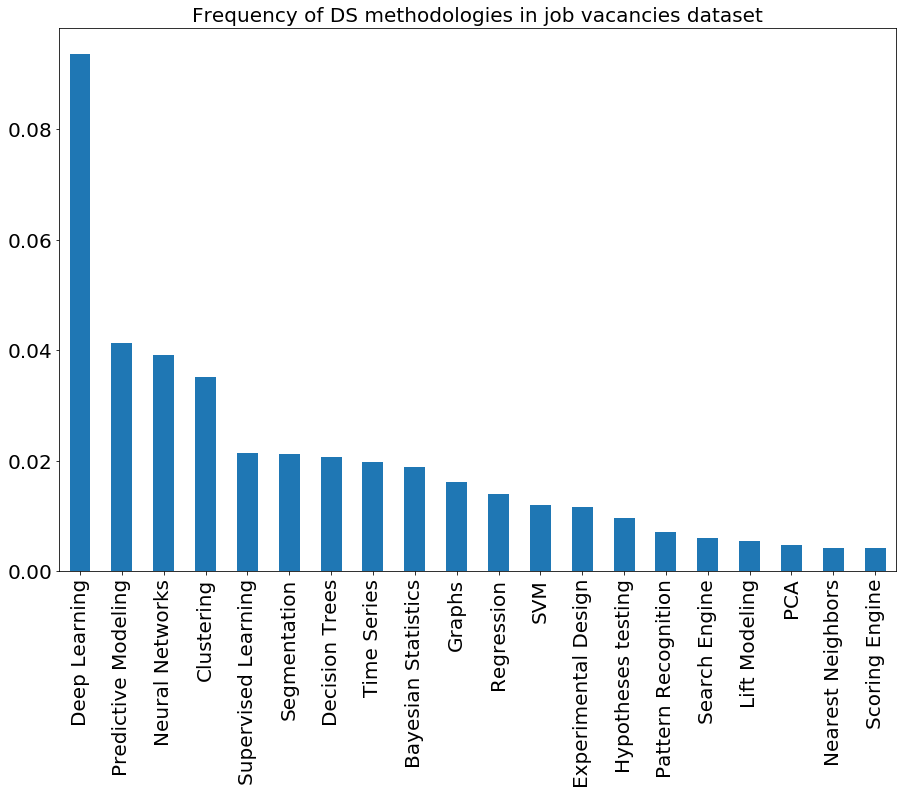

In [7]:
ds_skills=prepare_skills('DS_algo')

ds_res=get_skills(job_ds['Job_Description'], ds_skills)

ds_df = pd.DataFrame(ds_res).apply(pd.to_numeric)

ds_df = ds_df[ds_df.columns[ds_df.sum() != 0]]

plt.figure(figsize=(25,15))
ds_df.mean().sort_values(ascending=False).plot.bar()
plt.title('Frequency of DS methodologies in job vacancies dataset', size=20)
plt.xticks(size=15)
plt.yticks(size=20)
plt.show()

# ds_threshold = np.quantile(ds_df.mean(), 0.25)
ds_reduced_df = ds_df[ds_df.columns[ds_df.mean() > 0.003]]

plt.figure(figsize=(15,10))
ds_reduced_df.mean().sort_values(ascending=False).plot.bar()
plt.title('Frequency of DS methodologies in job vacancies dataset', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

From bar chart we could see that certain DS methodologies are definetly has more demand than others. Top 5 is:
- Deep Learning;
- Neural Networks;
- Predictive Modeling;
- Clustering;
- Supervised Learning.

As next step, I will build cluster map to see if certain methodologies are logically belongs together and appear in same job offerings simultaneously. Here I used only reduced dataset with removed skills which are too seldom. 

<Figure size 1800x1080 with 0 Axes>

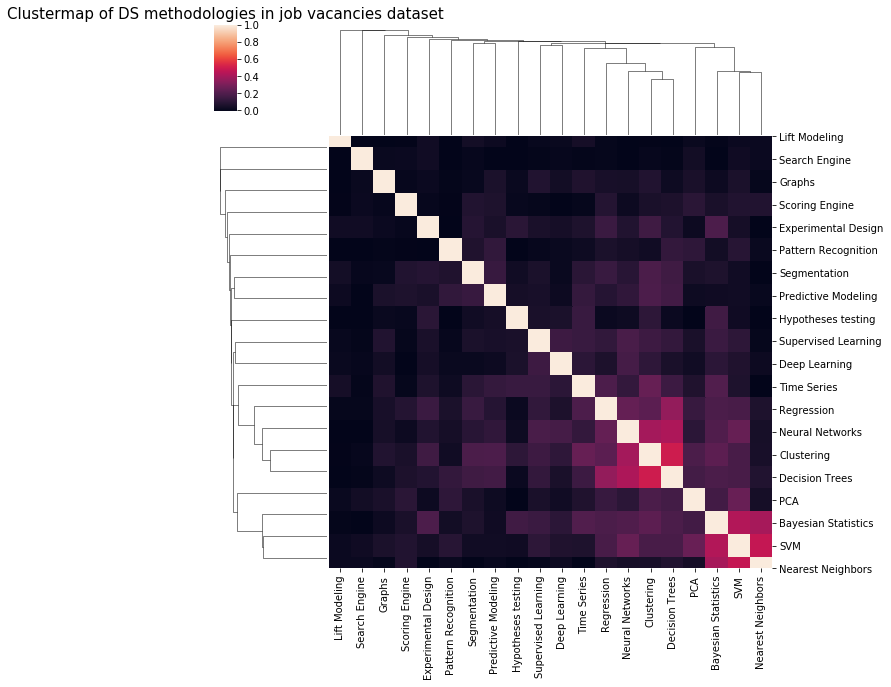

In [8]:
# plt.figure(figsize=(25,15))
# cor = ds_reduced_df.corr() #Calculate the correlation of the above variables
# sns.heatmap(cor, square = True) #Plot the correlation as heat map
# plt.show()
# fig = plt.figure(figsize=(25,15))
# fig.set_facecolor('#EEEEEE')

plt.figure(figsize=(25,15))
# cmap = sns.diverging_palette(h_neg=190, h_pos=350, s=80, l=45, as_cmap=True)
sns.clustermap(ds_reduced_df.corr(), method="single", robust=True)
plt.title('Clustermap of DS methodologies in job vacancies dataset', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

From clustermap it looks like we have certain clusters among DS methodologies. Hence, it make sense to build hierarchical clustering of data.

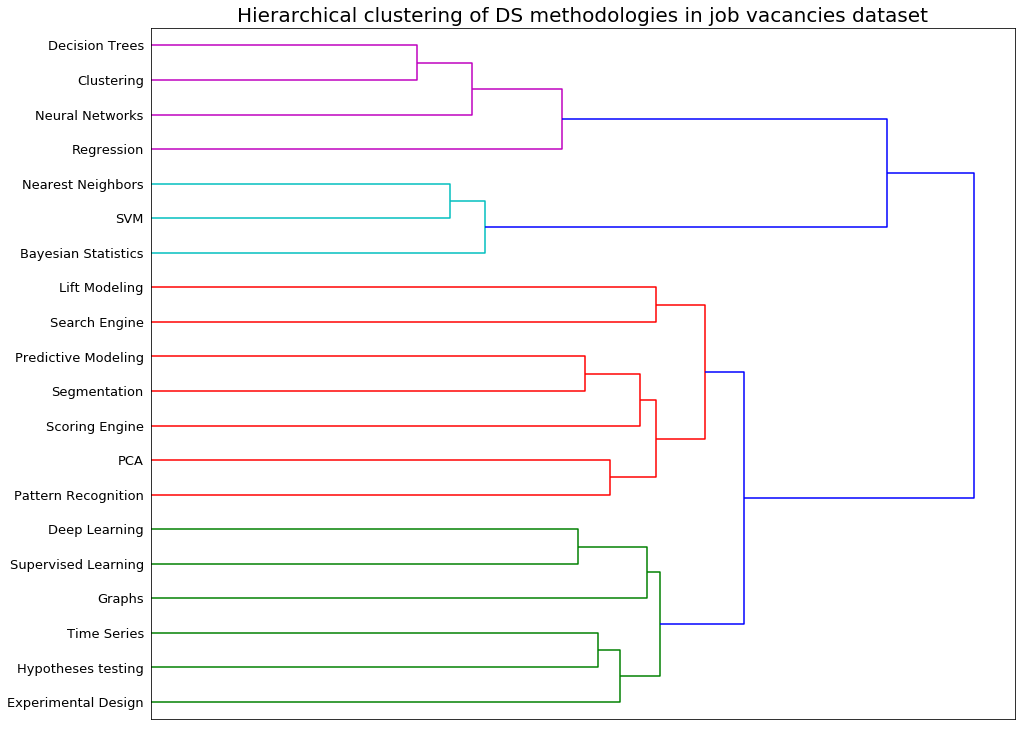

In [9]:
# fig = plt.figure(figsize=(30,16))
# ax1 = fig.add_axes([0.1,0.1,0.4,0.6])
# X=ds_df.corr()
# Z=sch.linkage(X, 'ward')
# dend = sch.dendrogram(Z, orientation='right', leaf_font_size=12)
# labels = X.index[dend['leaves']]
# ax1.set_xticks([])
# ax1.set_yticklabels(labels)
# plt.show()

fig = plt.figure(figsize=(30,16))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])
X=ds_reduced_df.corr()
Z=sch.linkage(X, 'ward')
dend = sch.dendrogram(Z, orientation='right', leaf_font_size=13)
labels = X.index[dend['leaves']]
plt.title('Hierarchical clustering of DS methodologies in job vacancies dataset', size=20)
ax1.set_xticks([])
ax1.set_yticklabels(labels)
plt.show()

From hierarchical cluster we could derive four main clustrs which are requsted together in different vacancies.

Cluster 1:
- Nearest Neighbors;
- SVM;
- Bayesian Statistics.

Cluster 2:
- Regression;
- Decission Trees;
- Clustering;
- Neural Networks.

Cluster 3:
- Deep Learning;
- Supervised Learning;
- Graphs;
- Time Series;
- Hypotesis Testing;
- Experimental Design.

Cluster 4:
- Lift Modeling;
- Search Engine;
- Predictive Modeling;
- Segmentation;
- Scoring Engine;
- PCA;
- Pattern Recognition.


#### Online courses dataser and DS methodologies skillset
Now we will repeat same algorithm for data from courses collected by other teammates. Checking for DS methodologies amongs those cources and how well those are represented in the dataset.

Since certain skill does not appears at all, I am removing those from resulting data set. Also I decided that skills on the right hand side of bar chart are not representative enough and drop those from dataset for further analysis. Barcharts provided before and after fields were dropped. Drop criteria - mean of column is less than 0.003.

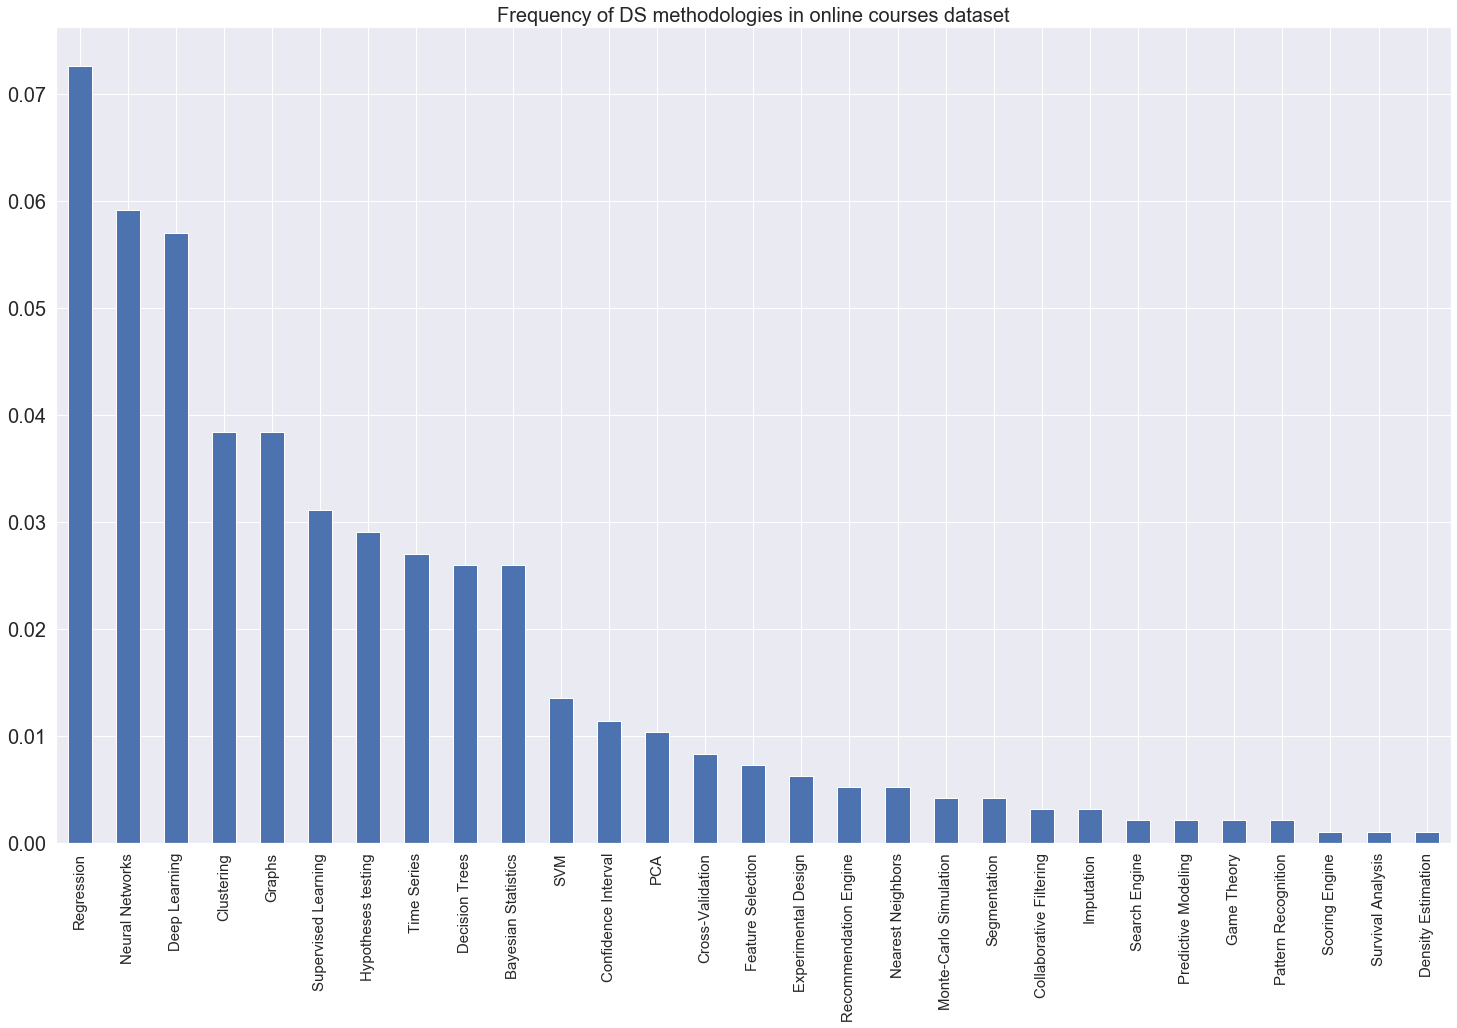

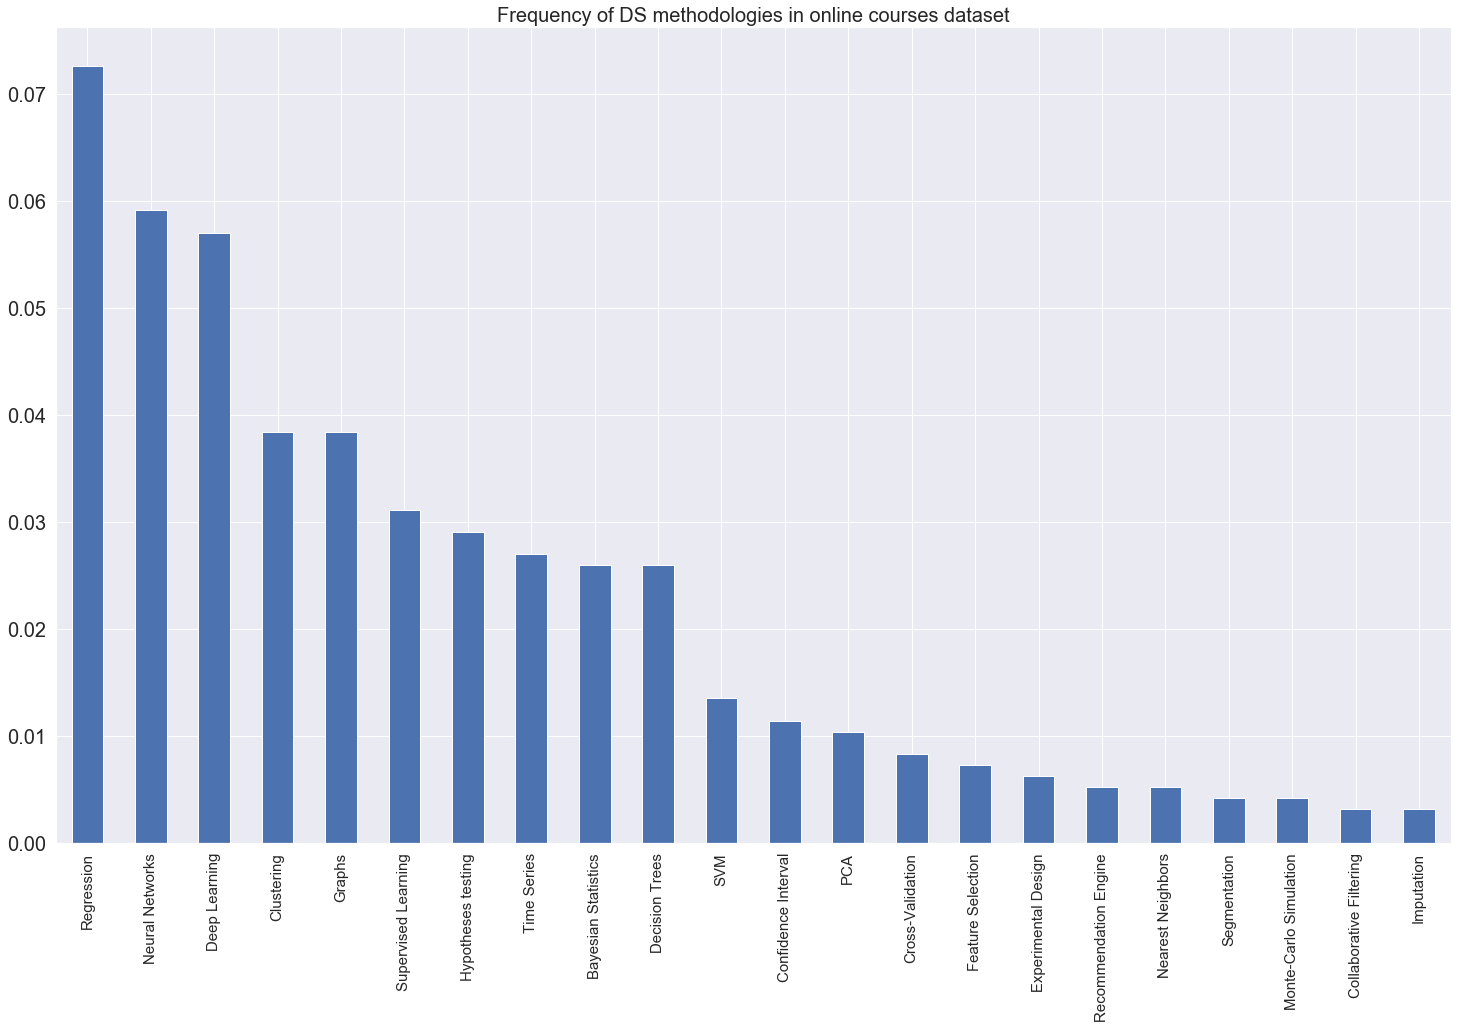

<Figure size 1800x1080 with 0 Axes>

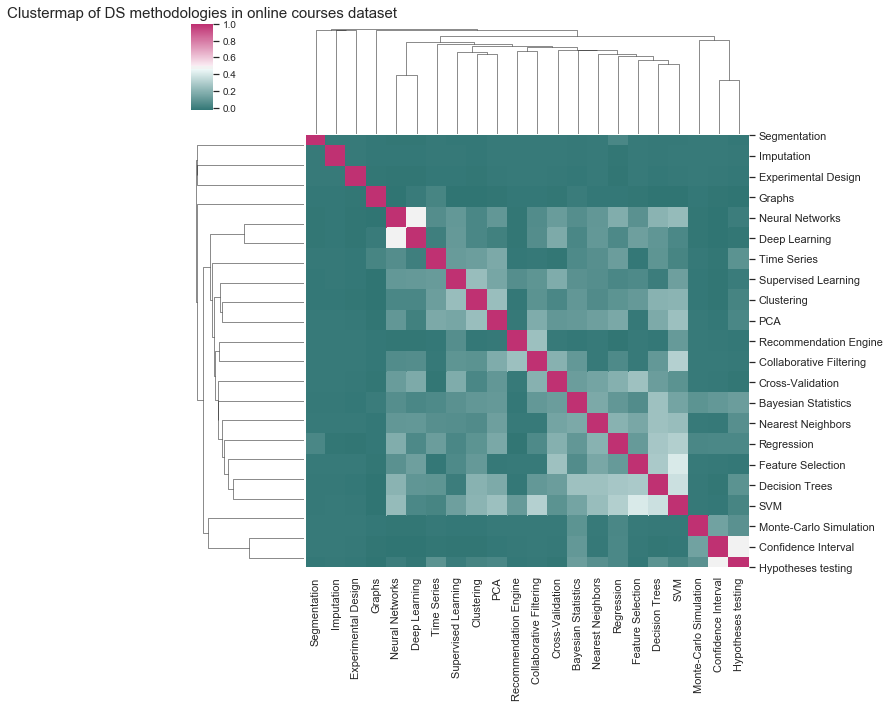

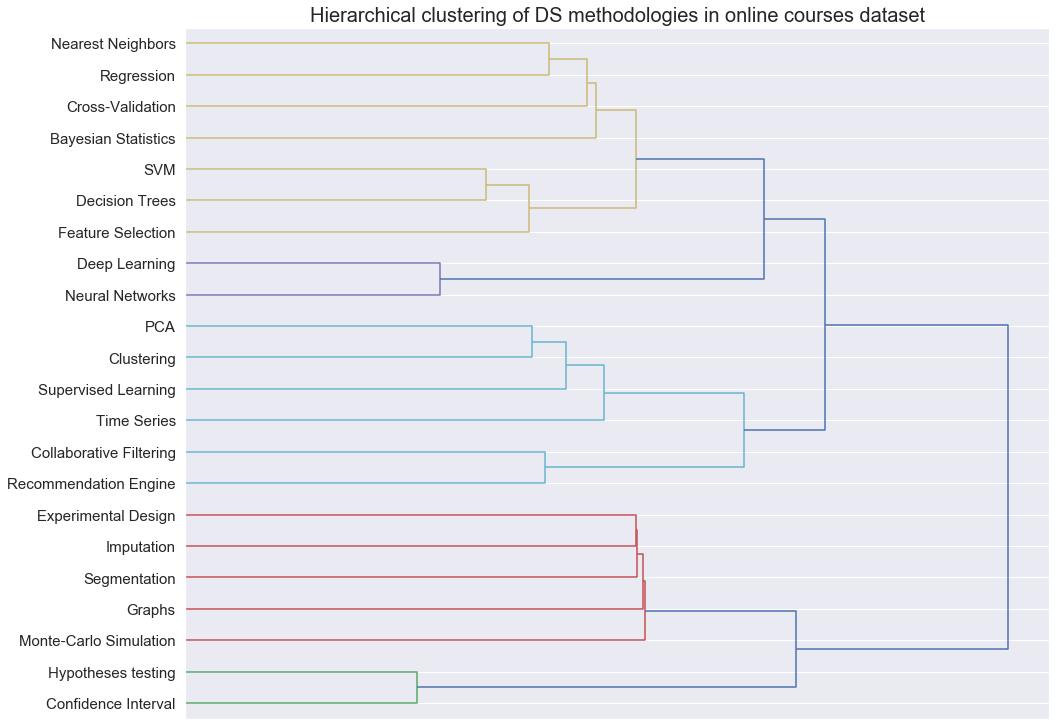

In [44]:
ds_skills=prepare_skills('DS_algo')

ds_courses_res=get_skills(courses_ds['Skills'].astype(dtype=str), ds_skills)

ds_courses_df = pd.DataFrame(ds_courses_res).apply(pd.to_numeric)

ds_courses_df = ds_courses_df[ds_courses_df.columns[ds_courses_df.sum() != 0]]

# ds_courses_threshold = np.quantile(ds_courses_df.mean(), 0.25)
ds_courses_reduced_df = ds_courses_df[ds_courses_df.columns[ds_courses_df.mean() > 0.003]]

plt.figure(figsize=(25,15))
ds_courses_df.mean().sort_values(ascending=False).plot.bar()
plt.title('Frequency of DS methodologies in online courses dataset', size=20)
plt.xticks(size=15)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(25,15))
ds_courses_reduced_df.mean().sort_values(ascending=False).plot.bar()
plt.title('Frequency of DS methodologies in online courses dataset', size=20)
plt.xticks(size=15)
plt.yticks(size=20)
plt.show()

# plt.figure(figsize=(25,15))
# cor = ds_courses_reduced_df.corr() #Calculate the correlation of the above variables
# sns.heatmap(cor, square = True) #Plot the correlation as heat map
# plt.show()

fig = plt.figure(figsize=(25,15))
fig.set_facecolor('#EEEEEE')

cmap = sns.diverging_palette(h_neg=190, h_pos=350, s=80, l=45, as_cmap=True)

# plt.figure(figsize=(25,15))
sns.clustermap(ds_courses_reduced_df.corr(), method="single", robust=True, cmap=cmap)
plt.title('Clustermap of DS methodologies in online courses dataset', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

# fig = plt.figure(figsize=(30,16))
# ax1 = fig.add_axes([0.1,0.1,0.4,0.6])
# X=ds_courses_df.corr()
# Z=sch.linkage(X, 'ward')
# dend = sch.dendrogram(Z, orientation='right', leaf_font_size=15)
# labels = X.index[dend['leaves']]
# ax1.set_xticks([])
# ax1.set_yticklabels(labels)
# plt.show()

fig = plt.figure(figsize=(30,16))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])
X=ds_courses_reduced_df.corr()
Z=sch.linkage(X, 'ward')
dend = sch.dendrogram(Z, orientation='right', leaf_font_size=15)
labels = X.index[dend['leaves']]
plt.title('Hierarchical clustering of DS methodologies in online courses dataset', size=20)
ax1.set_xticks([])
ax1.set_yticklabels(labels)
plt.show()


From online courses dataset we could identify following clusters:

Cluster 1:
- Nearest Neighbors;
- Regression;
- Cross-Validation;
- Bayesian Statistics;
- SVM;
- Decission Trees;
- Feature Selection.

Cluster 2:
- Deep Learning;
- Neural Networks;

Cluster 3:
- PCA;
- Clustering;
- Supervised Learning;
- Time Series;
- Collaborative Filtering;
- Recommendation Engine.

Cluster 4:
- Experimental Design;
- Imputation;
- Segmentation;
- Graphs;
- Monte-Carlo Simulation.

Cluster 5:
- Hypotheses testing;
- Confidence Interval.

#### Job vacancies dataset and Business Domain skillset
Now we will repeat same algorithm for data from job vacancies. But this time we will check for most frequently related business domain amongs those vacancies and how well those are represented in the dataset.

Since certain domains does not appears at all, I am removing those from resulting data set. Also I decided that domains on the right hand side of bar chart are not representative enough and drop those from dataset for further analysis. Barcharts provided before and after fields were dropped. Drop criteria - mean of column is less than 0.003.

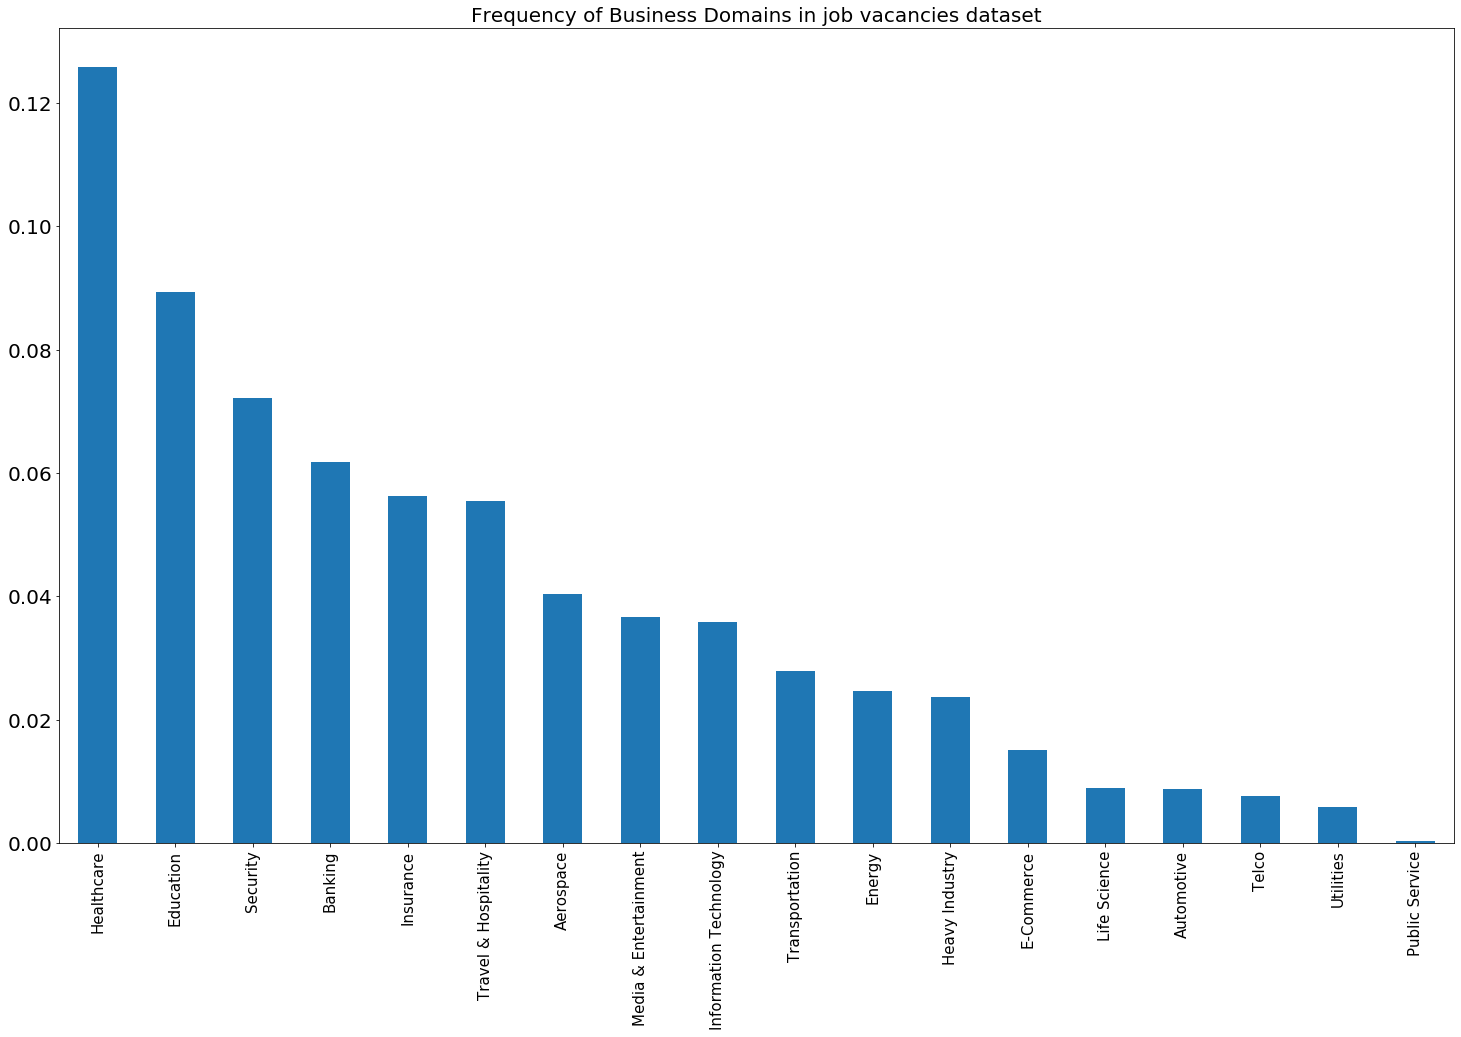

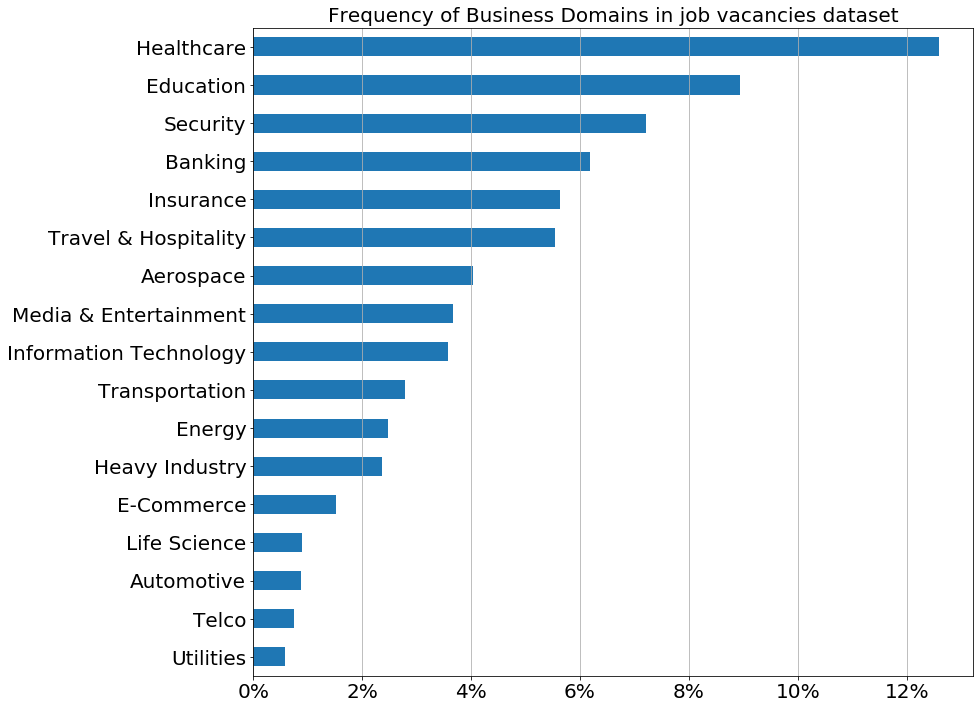

<Figure size 1800x1080 with 0 Axes>

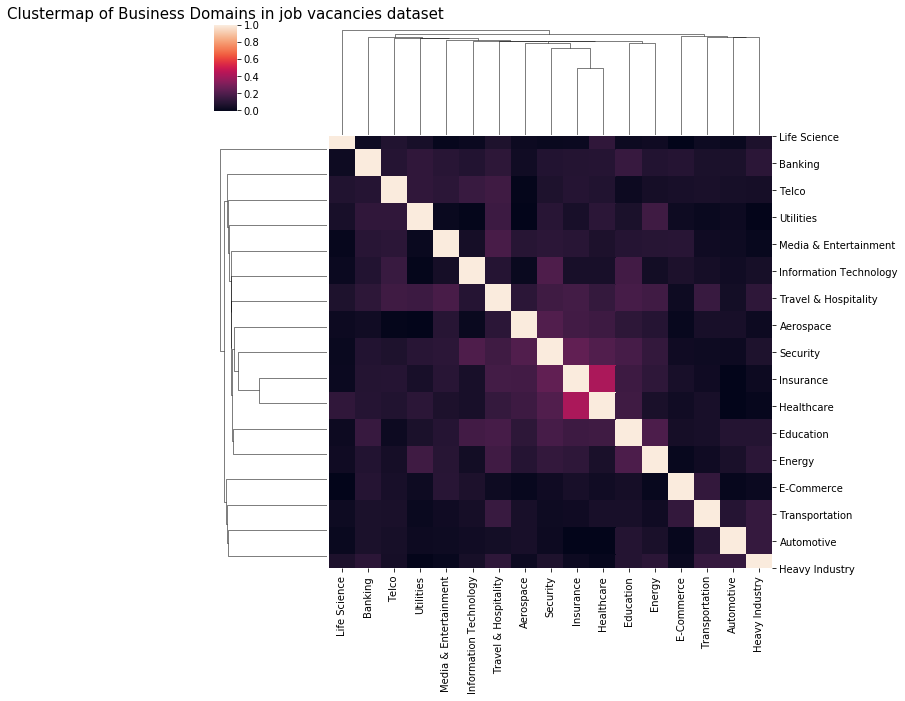

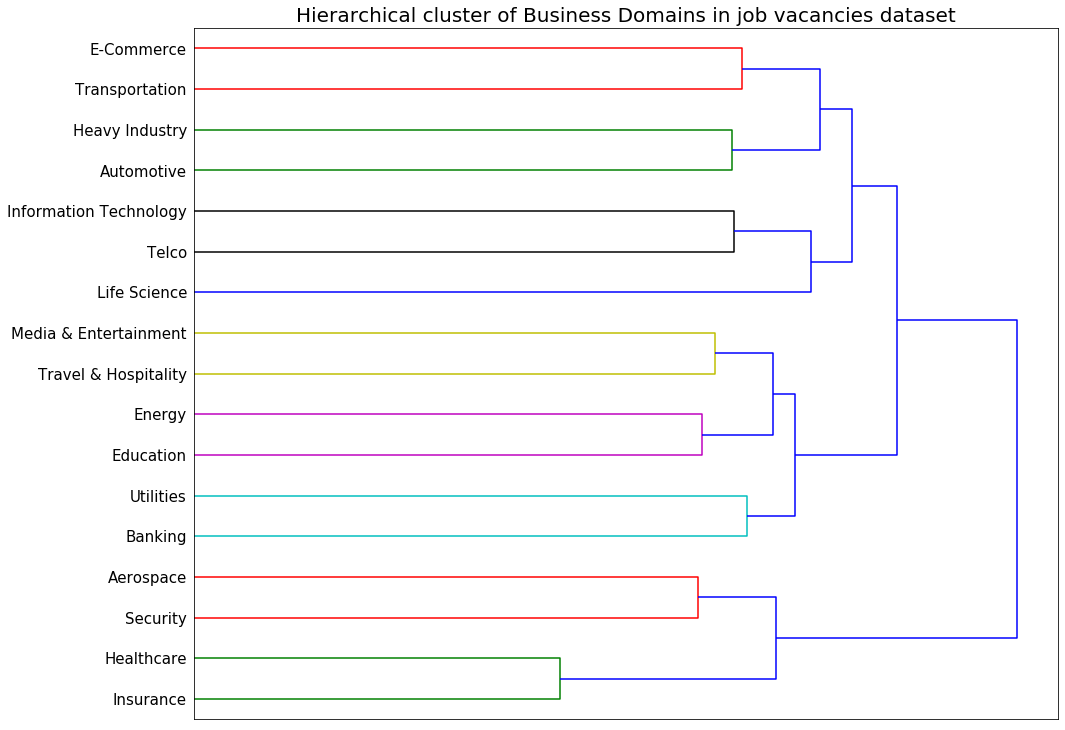

In [49]:
bus_domain_skills=prepare_skills('business_domain')

bus_domain_res=get_skills(job_ds['Job_Description'], bus_domain_skills)

bus_domain_df = pd.DataFrame(bus_domain_res).apply(pd.to_numeric)

bus_domain_df = bus_domain_df[bus_domain_df.columns[bus_domain_df.sum() != 0]]

bus_domain_reduced_df = bus_domain_df[bus_domain_df.columns[bus_domain_df.mean() > 0.003]]

plt.figure(figsize=(25,15))
bus_domain_df.mean().sort_values(ascending=False).plot.bar()
plt.title('Frequency of Business Domains in job vacancies dataset', size=20)
plt.xticks(size=15)
plt.yticks(size=20)
plt.show()

fig = plt.figure(figsize=(25,15))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])
# bus_domain_reduced_df.mean().sort_values(ascending=False).plot.bar()
df_percent = bus_domain_reduced_df.mean()*100
df_percent.sort_values(ascending=True).plot.barh()
plt.title('Frequency of Business Domains in job vacancies dataset', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(axis='x')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax1.xaxis.set_major_formatter(xticks)
plt.show()

# plt.figure(figsize=(25,15))
# cor = bus_domain_reduced_df.corr() #Calculate the correlation of the above variables
# sns.heatmap(cor, square = True) #Plot the correlation as heat map
# plt.show()

plt.figure(figsize=(25,15))
sns.clustermap(bus_domain_reduced_df.corr(), method="single", robust=True)
plt.title('Clustermap of Business Domains in job vacancies dataset', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

fig = plt.figure(figsize=(30,16))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])
X=bus_domain_reduced_df.corr()
Z=sch.linkage(X, 'ward')
dend = sch.dendrogram(Z, orientation='right', leaf_font_size=15)
labels = X.index[dend['leaves']]
plt.title('Hierarchical cluster of Business Domains in job vacancies dataset', size=20)
ax1.set_xticks([])
ax1.set_yticklabels(labels)
plt.show()

For Business Domains we could derive following clusters based on hierarchical clustering.

Cluster 1:
- E-Commerce;
- Transportation\Logistics;
- Automotive;
- Life Science.

Cluster 2:
- Utilities;
- Banking.

Cluster 3:
- Energy;
- Education.

Cluster 4:
- Media & Entertainment;
- Travel & Hospitality;
- Telco.

Cluster 5:
- Security;
- Indutry;
- Information Technology;
- Aerospace.

Cluster 6:
- Healthcare;
- Insurance.

#### Conclusion:
Based on insights from exploratory analysis I could suggest following changes to curriculum for UCU: Intro to Data Science and Analytics course:
- We need to dedicate some time for the introduction about Deep Learning. Since in all datasets I have explored Deep Learning appears most frequently than anything else. It goes hand-by-hand together with Clustering, Neural Networks and other Supervised Learning techniques;
- Based on business domains analysis amongs 8000+ job vacancies dataset I dicover that certain business domains appears more often than others. Top 5 are: Industry, Healthcare, Education, Security and Banking. Due to legal regulations there are differencies between Data Science across different business domains. So I would suggest to include into curriculum of course overview of differencies in data science accross different business domains.
- Based on my personal expirience with Intro to Data Science and Analytics course I would also suggest to add interim homeworks which will help to develop necessary skills and knowledge with smaller and easy to diggest tasks. This will equip students with right tools to deal with Course Project in the end. Jumpstart from 0 practical expirience to course project was quite tough exercise for me personally.  

## Part 2 – Data Science program curriculum design

### Data processing and visualization

#### Job vacancies dataset and Soft skills skillset
I have prepare wide list of soft skills and respective search terms for those. Using this list I would like to check which ones appears in job vacancies more often and which not. I will check again using simple bar plot for frequency of skills appearing in job postings.

Since certain skill does not appears at all, I am removing those from resulting data set. Also I decided that skills on the right hand side of bar chart are not representative enough and drop those from dataset for further analysis. Barcharts provided before and after fields were dropped. Drop criteria - mean of column is less than 0.003.

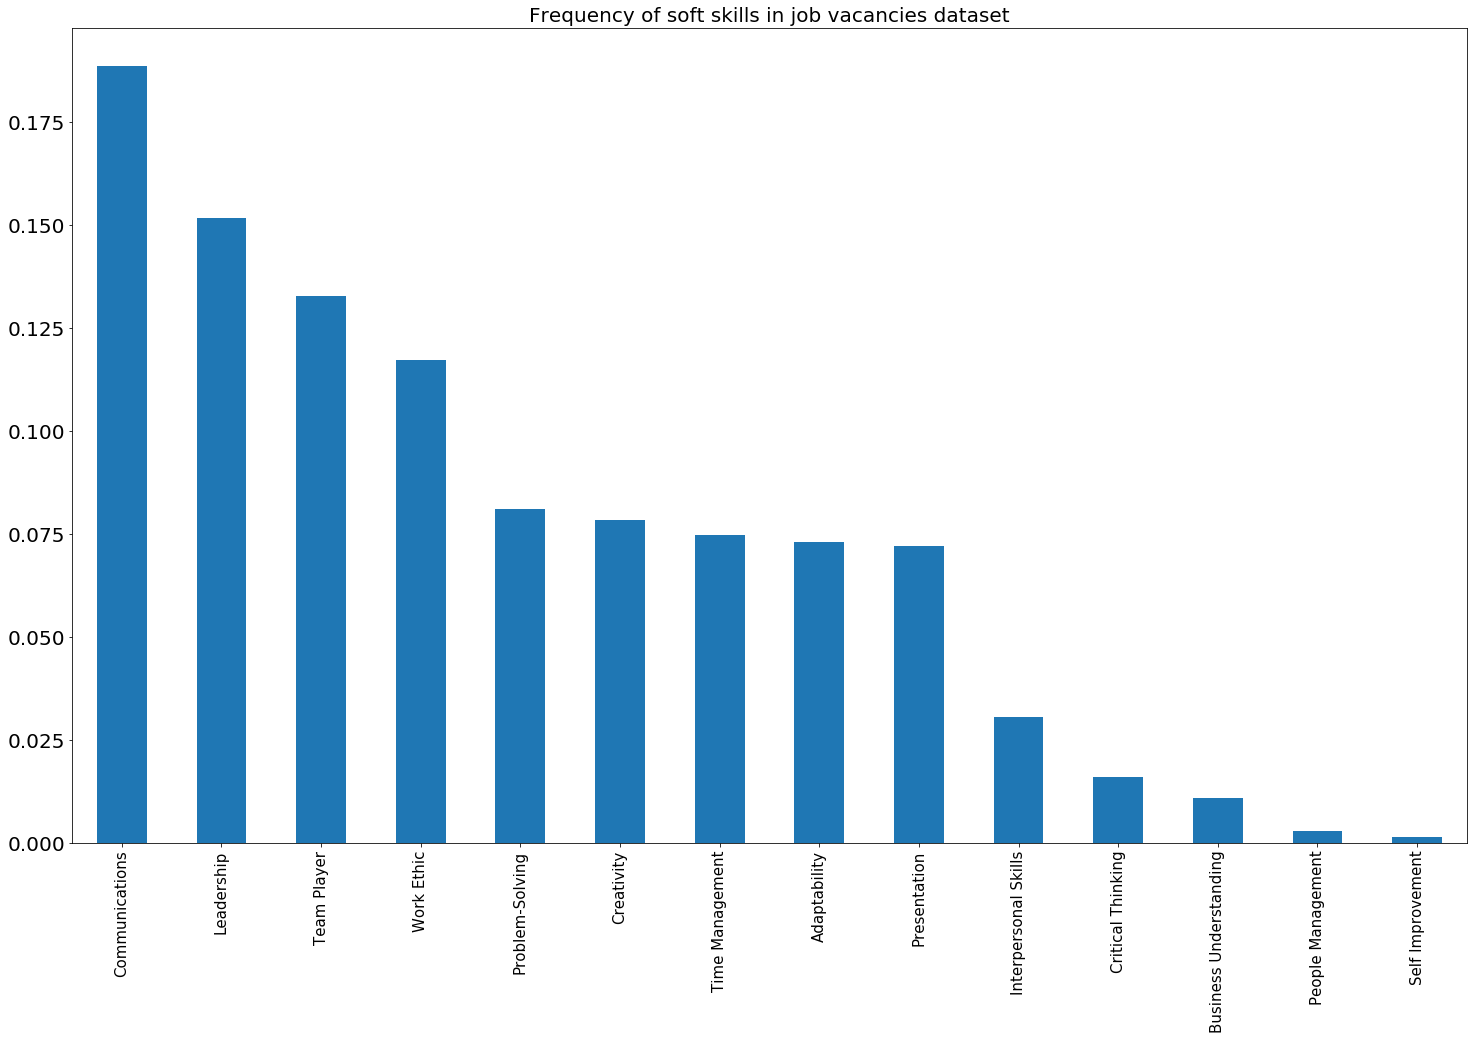

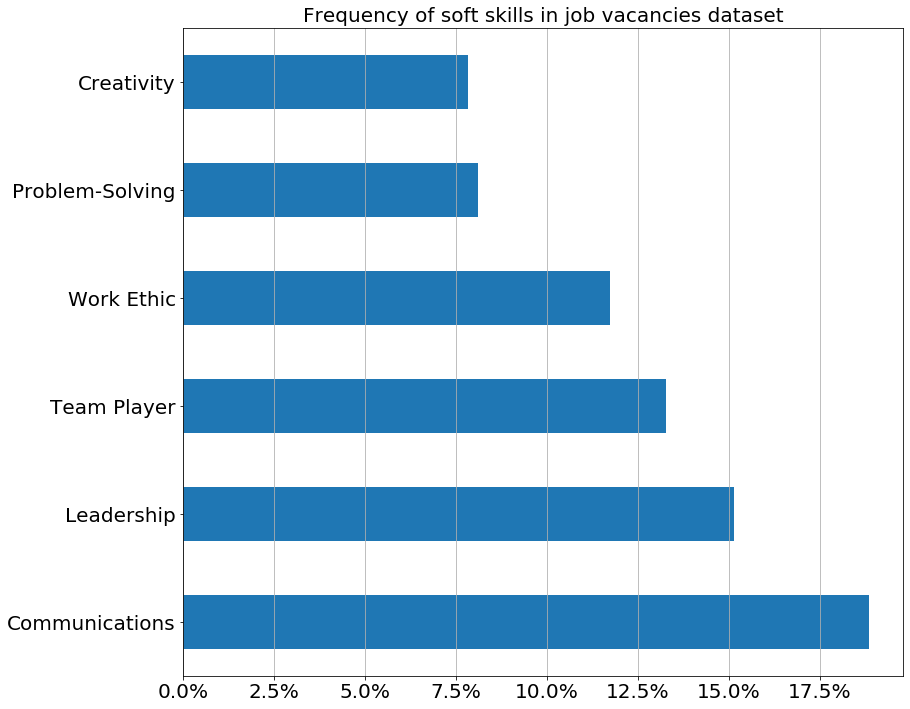

In [35]:
soft_skills=prepare_skills('soft_skills')

soft_res=get_skills(job_ds['Job_Description'], soft_skills)

soft_df = pd.DataFrame(soft_res).apply(pd.to_numeric)

soft_df = soft_df[soft_df.columns[soft_df.sum() != 0]]

plt.figure(figsize=(25,15))
soft_df.mean().sort_values(ascending=False).plot.bar()
plt.title('Frequency of soft skills in job vacancies dataset', size=20)
plt.xticks(size=15)
plt.yticks(size=20)
plt.show()

# soft_threshold = np.quantile(soft_df.mean(), 0.25)
# soft_reduced_df = soft_df[soft_df.columns[soft_df.mean() > 0.003]]
soft_reduced_df = soft_df[soft_df.columns[soft_df.mean() > 0.075]]

fig = plt.figure(figsize=(25,15))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])
# soft_reduced_df.mean().sort_values(ascending=False).plot.bar()
mean_df = soft_reduced_df.mean()*100
mean_df.sort_values(ascending=False).plot.barh()
plt.title('Frequency of soft skills in job vacancies dataset', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(axis='x')
fmt = '%.1f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax1.xaxis.set_major_formatter(xticks)

plt.show()

From this bar plot we could see quite strong demand for certain soft skills based on vacancies dataset used for analysis. Top 6 skills are:
- Communications;
- Leadership;
- Team Player;
- Work Ethic;
- Creativity;
- Problem Solving.

Next, I am building heatmap and clustermap to check whether or not some skills appears together in job offers. 

<Figure size 1800x1080 with 0 Axes>

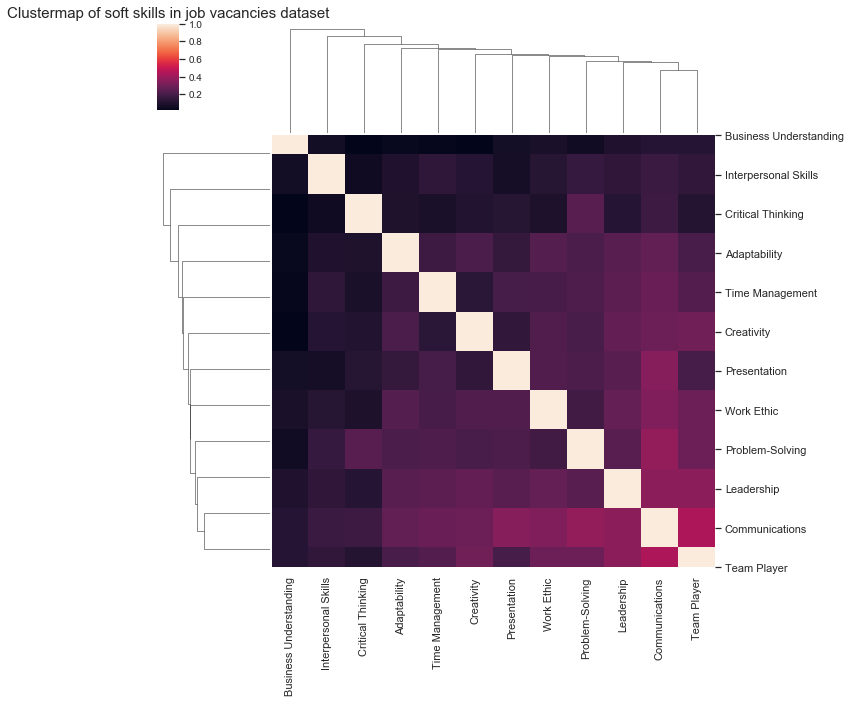

In [50]:
# plt.figure(figsize=(25,15))
# cor = soft_df.corr() #Calculate the correlation of the above variables
# sns.heatmap(cor, square = True) #Plot the correlation as heat map
# plt.show()

# plt.figure(figsize=(25,15))
# cor = soft_reduced_df.corr() #Calculate the correlation of the above variables
# sns.heatmap(cor, square = True) #Plot the correlation as heat map
# plt.show()

# plt.figure(figsize=(25,15))
# sns.clustermap(soft_df.corr(), method="single", robust=True)
# plt.show()

plt.figure(figsize=(25,15))
sns.clustermap(soft_reduced_df.corr(), method="single", robust=True)
plt.title('Clustermap of soft skills in job vacancies dataset', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

At this point correlation between soft skills not that strong, but still we could see certain posible clusters from clustermap. To explore further, I built hierarchical cluster for soft skill data based on amount of times certain skills appears in job offerings.

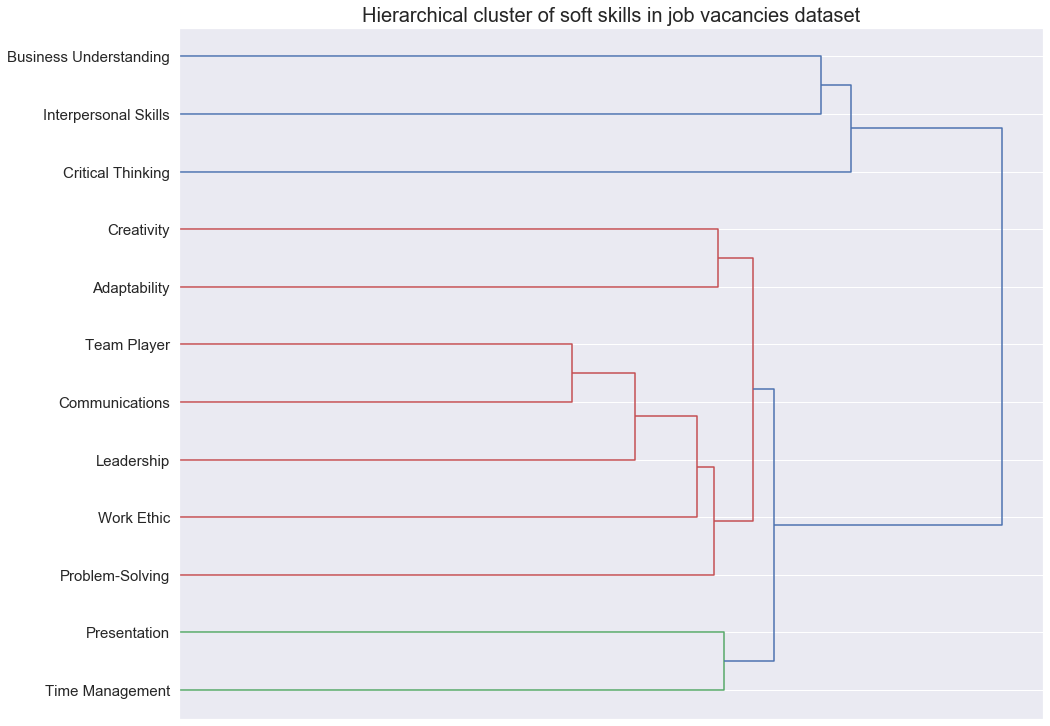

In [51]:
# fig = plt.figure(figsize=(30,16))
# ax1 = fig.add_axes([0.1,0.1,0.4,0.6])
# X=soft_df.corr()
# Z=sch.linkage(X, 'ward')
# dend = sch.dendrogram(Z, orientation='right', leaf_font_size=15)
# labels = X.index[dend['leaves']]
# ax1.set_xticks([])
# ax1.set_yticklabels(labels)
# plt.show()

fig = plt.figure(figsize=(30,16))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])
X=soft_reduced_df.corr()
Z=sch.linkage(X, 'ward')
dend = sch.dendrogram(Z, orientation='right', leaf_font_size=15)
labels = X.index[dend['leaves']]
plt.title('Hierarchical cluster of soft skills in job vacancies dataset', size=20)
ax1.set_xticks([])
ax1.set_yticklabels(labels)
plt.show()

From hierarchical cluster we could derive following clusters.

Cluster 1:
- Business Understanding;
- Interpersonal Skills;
- Critical Thinking.

Cluster 2:
- Presentation;
- Time Management.

Cluster 3:
- Creativity;
- Adaptability.

Cluster 4:
- Team Player;
- Communications;
- Leadership;
- Work Ethic;
- Problem-Solving.

#### Online cources dataset and Soft skills skillset
Now we will look for soft skills into courses dataset collected by teammates using same approach for data processing and visualization as for previous cases. 

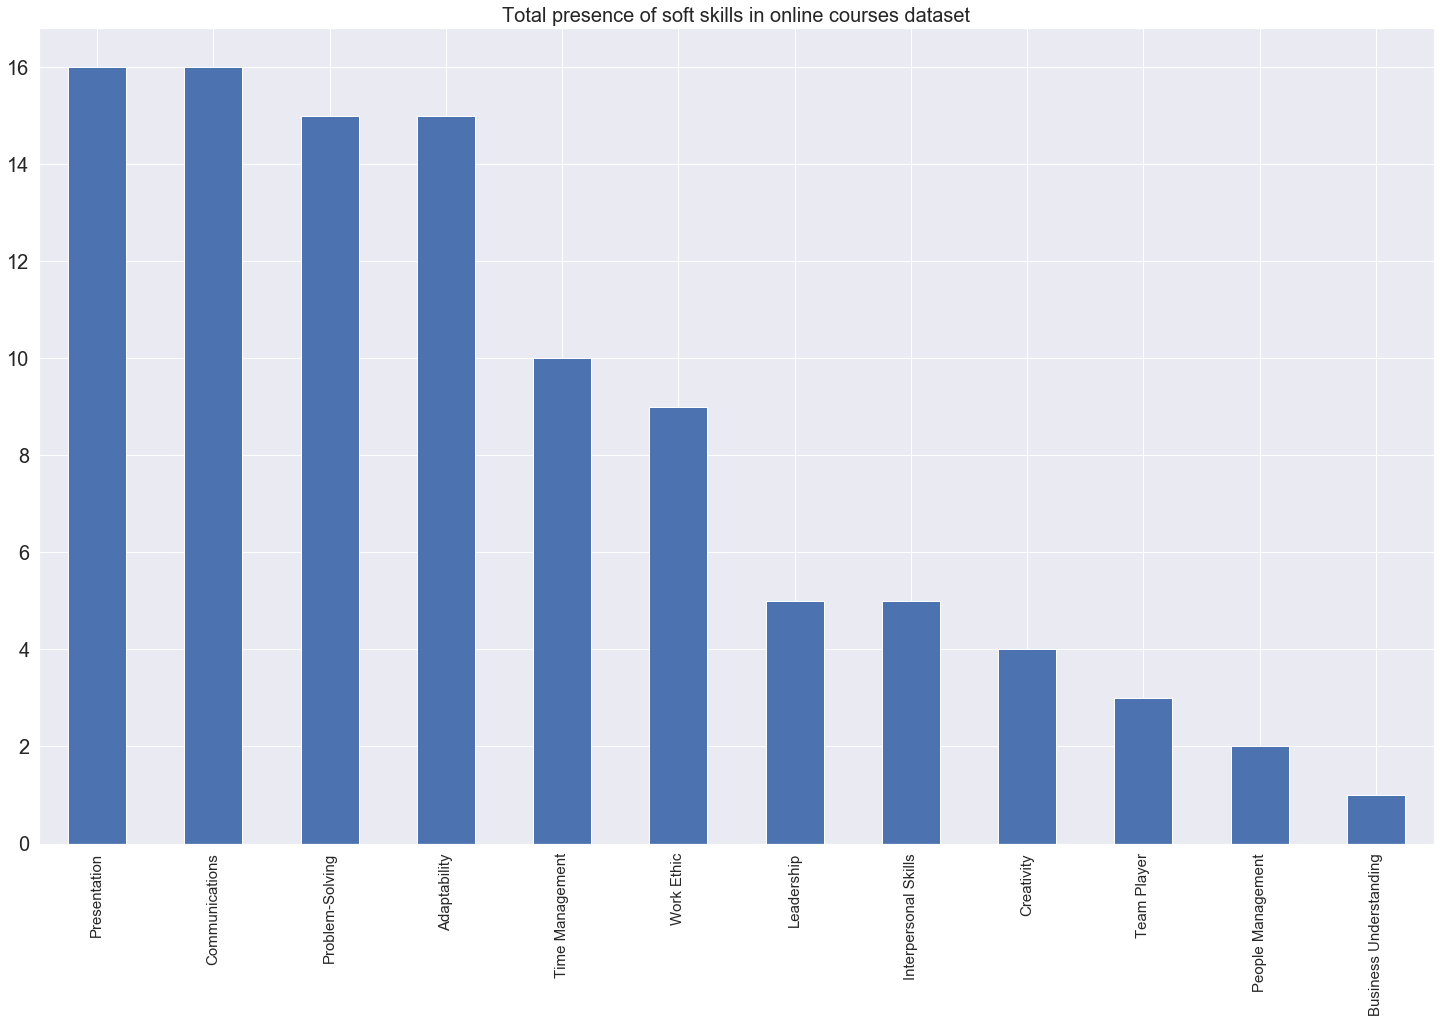

In [53]:
soft_skills=prepare_skills('soft_skills')

soft_courses_res=get_skills(courses_ds['Skills'].astype(dtype=str), soft_skills)

soft_courses_df = pd.DataFrame(soft_courses_res).apply(pd.to_numeric)

soft_courses_df = soft_courses_df[soft_courses_df.columns[soft_courses_df.sum() != 0]]

plt.figure(figsize=(25,15))
soft_courses_df.sum().sort_values(ascending=False).plot.bar()
plt.title('Total presence of soft skills in online courses dataset', size=20)
plt.xticks(size=15)
plt.yticks(size=20)
plt.show()


Overall amount of hints for soft skills among courses dataset is very low. Which is expected result, since courses were collected only for technology and data science related topics. Hence further analysis of courses dataset with regards to soft skills does not make any sense.

#### Job vacancies dataset and DS tools skillset
As a next step I have collected skillset of Data Science tools which I would like to check against vacancies dataset I was using before. I am using here exactly same approach as before.

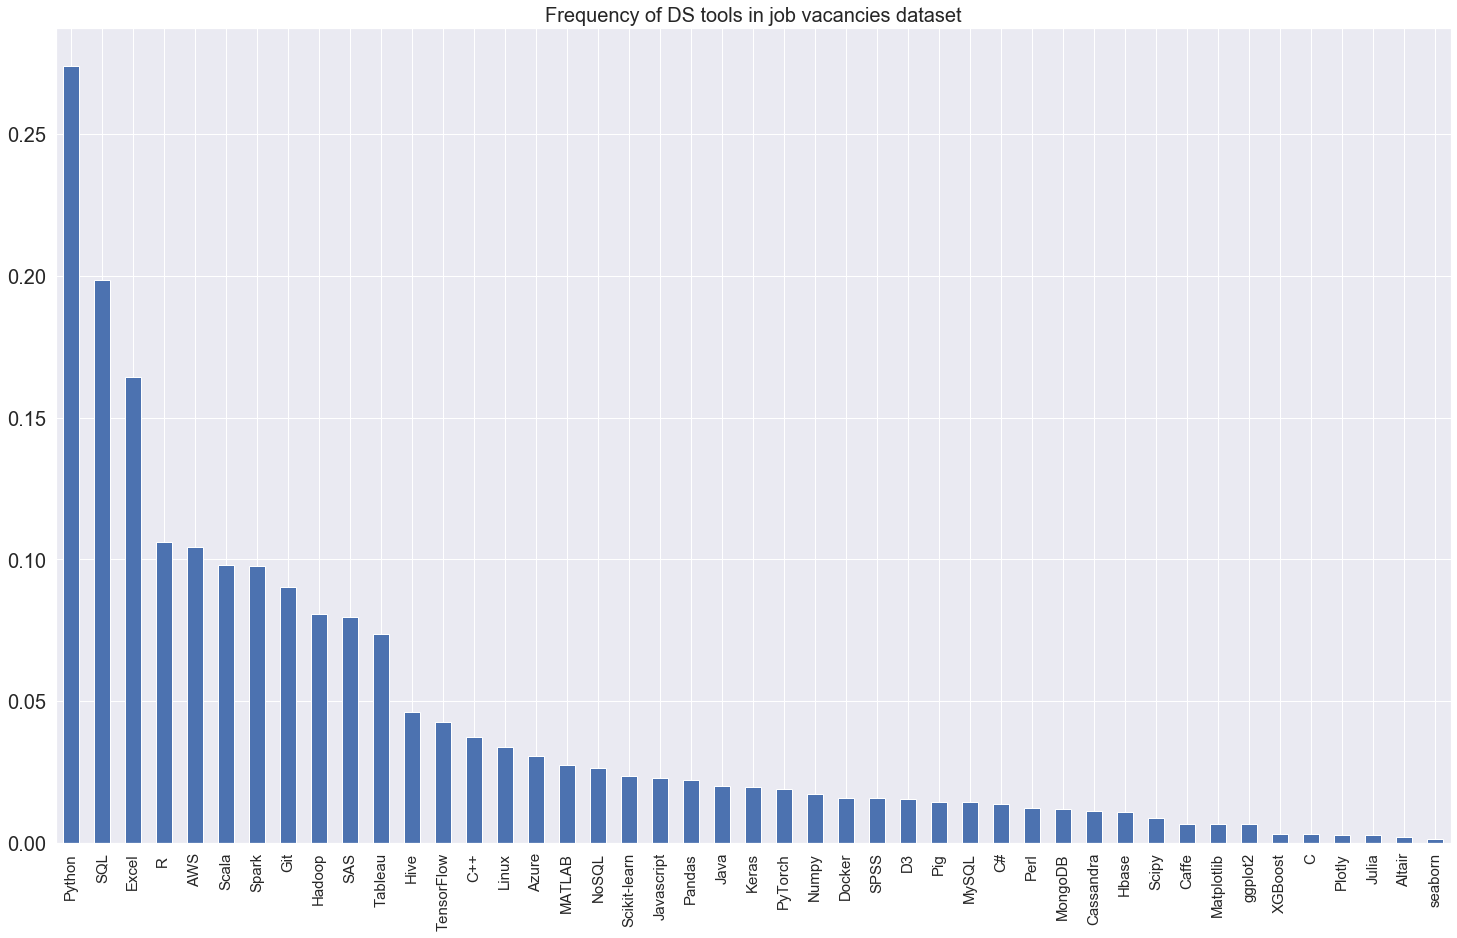

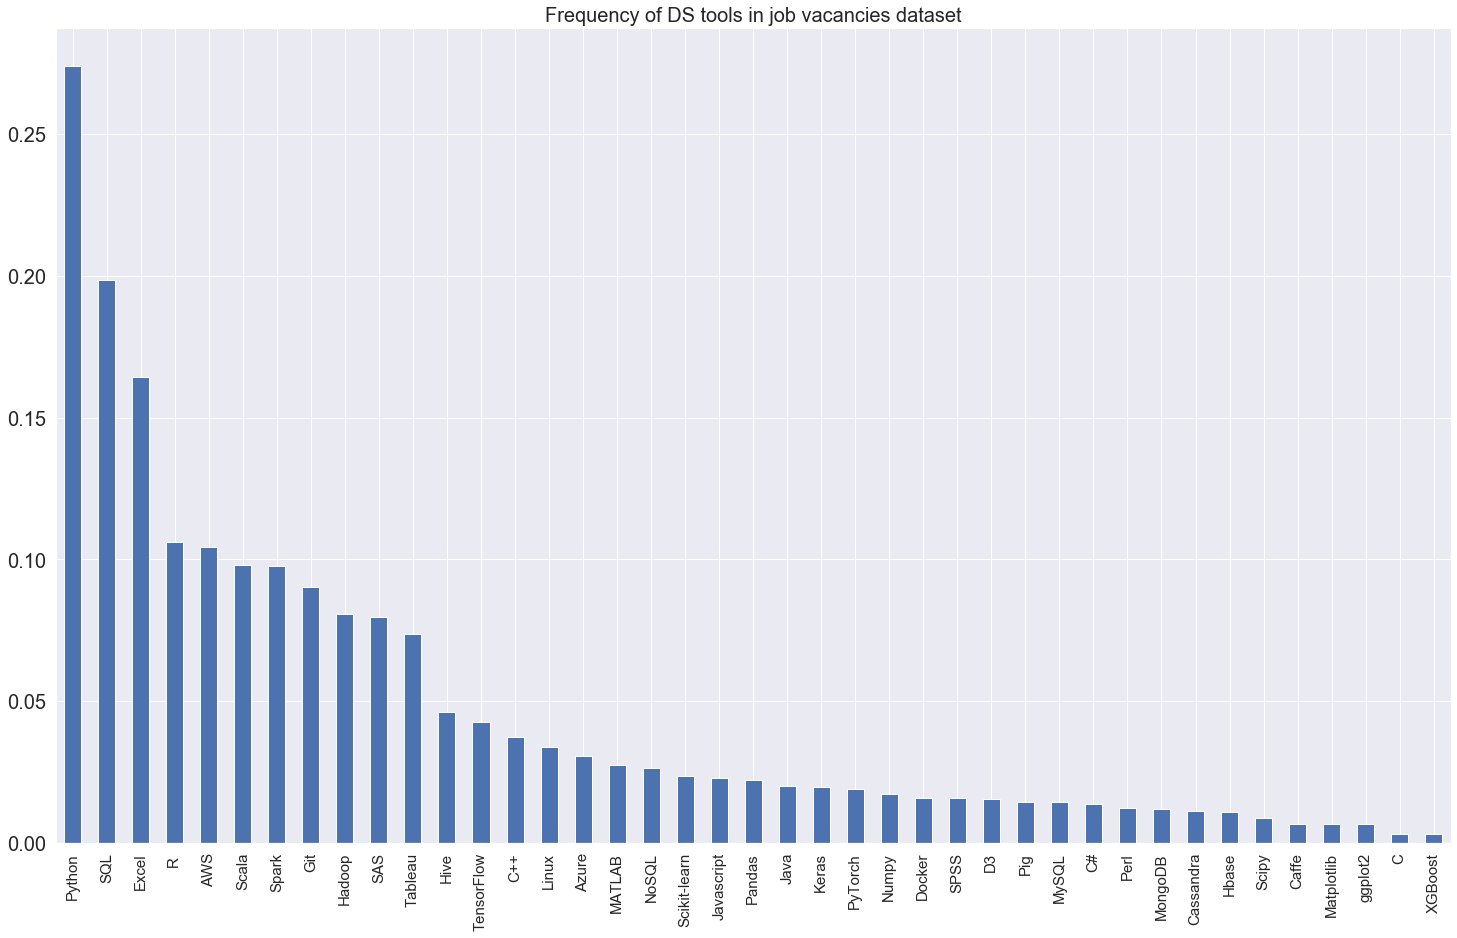

<Figure size 1800x1080 with 0 Axes>

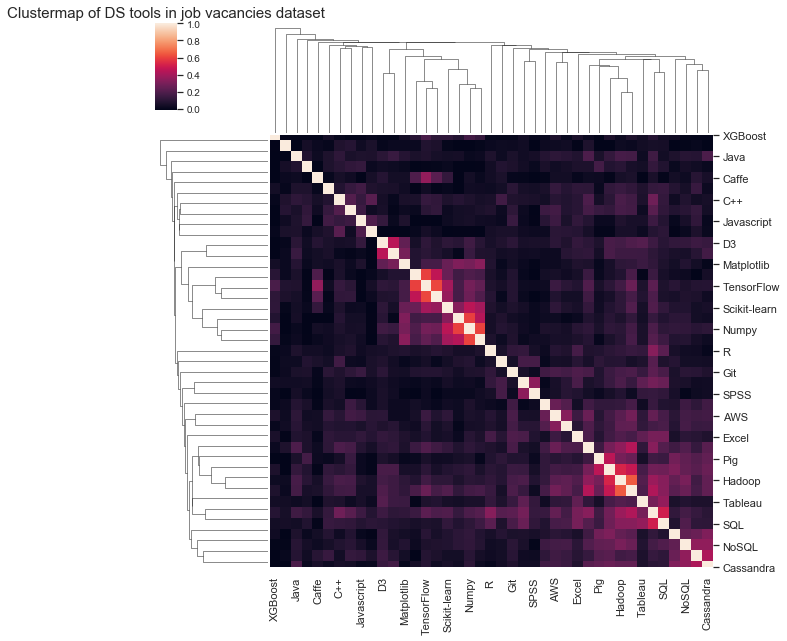

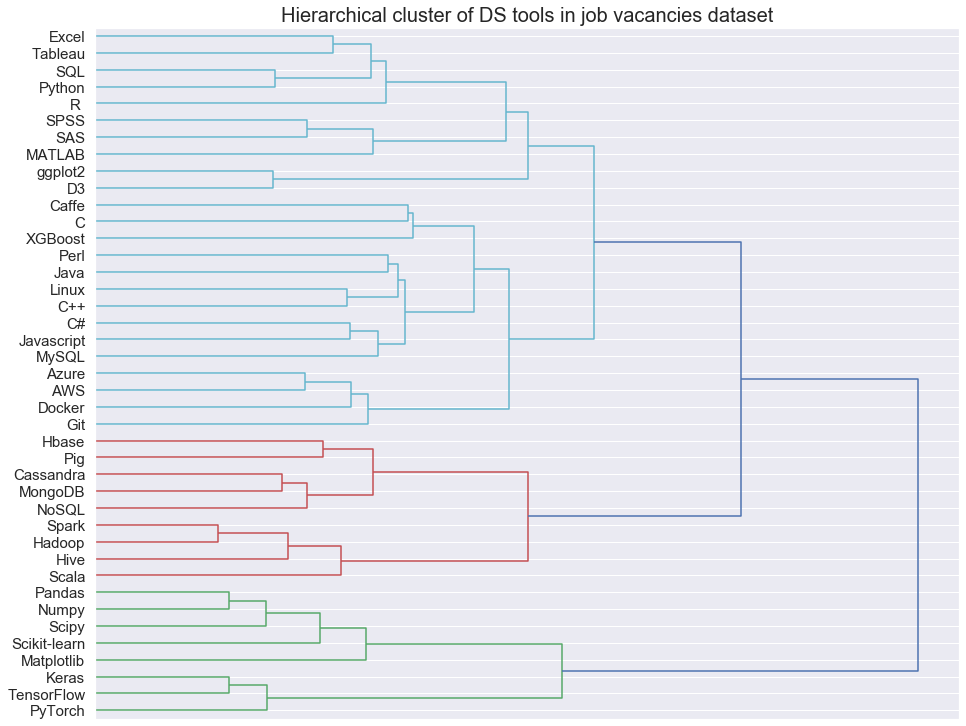

In [56]:
ds_tools_skills=prepare_skills('DS_tools')

ds_tools_res=get_skills(job_ds['Job_Description'], ds_tools_skills)

ds_tools_df = pd.DataFrame(ds_tools_res).apply(pd.to_numeric)

ds_tools_df = ds_tools_df[ds_tools_df.columns[ds_tools_df.sum() != 0]]

ds_tools_reduced_df = ds_tools_df[ds_tools_df.columns[ds_tools_df.mean() > 0.003]]

plt.figure(figsize=(25,15))
ds_tools_df.mean().sort_values(ascending=False).plot.bar()
plt.title('Frequency of DS tools in job vacancies dataset', size=20)
plt.xticks(size=15)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(25,15))
ds_tools_reduced_df.mean().sort_values(ascending=False).plot.bar()
plt.title('Frequency of DS tools in job vacancies dataset', size=20)
plt.xticks(size=15)
plt.yticks(size=20)
plt.show()

# plt.figure(figsize=(25,15))
# cor = ds_tools_reduced_df.corr() #Calculate the correlation of the above variables
# sns.heatmap(cor, square = True) #Plot the correlation as heat map
# plt.show()

plt.figure(figsize=(25,15))
sns.clustermap(ds_tools_reduced_df.corr(), method="single", robust=True)
plt.title('Clustermap of DS tools in job vacancies dataset', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

fig = plt.figure(figsize=(30,16))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])
X=ds_tools_reduced_df.corr()
Z=sch.linkage(X, 'ward')
dend = sch.dendrogram(Z, orientation='right', leaf_font_size=15)
labels = X.index[dend['leaves']]
plt.title('Hierarchical cluster of DS tools in job vacancies dataset', size=20)
ax1.set_xticks([])
ax1.set_yticklabels(labels)
plt.show()

From barchart plot we could see that most demand exist for big data tools like Hadoop, Spark, Hive and Scala. Another categoty for high demand is R and Python which was expected.

From hierarchical clustering we could spot following clusters. 

Cluster 1:
- Pandas;
- Numpy;
- Scipy;
- Scikit-learn;
- Matplotlib;
- Keras;
- TensorFlow;
- PyTorch.

Cluster 2:
- Hbase;
- Pig;
- Cassandra;
- MongoDB;
- NoSQL;
- Spark;
- Hadoop;
- Hive;
- Scala.

Cluster 3:
- Azure;
- AWS;
- Docker;
- Git.

Cluster 4:
- Perl;
- Java;
- Linux;
- C++;
- C#;
- Javascript;
- MySQL.

Cluster 5:
- Caffe;
- C;
- XGBoost.

Cluster 6:
- ggplot2;
- D3.

Cluster 7:
- SPSS;
- SAS;
- MATLAB.

Cluster 8:
- Excel;
- Tableau;
- SQL;
- python;
- R.

#### Job vacancies dataset and Machine Learning algorithms skillset
I have prepared more deep list of machine learning algorithm and would like to explore with wich frequency such algorithms appear amongs jog vacancies dataset. I will apply same aproach as before to check frequency and build hierarcical cluster as last step.

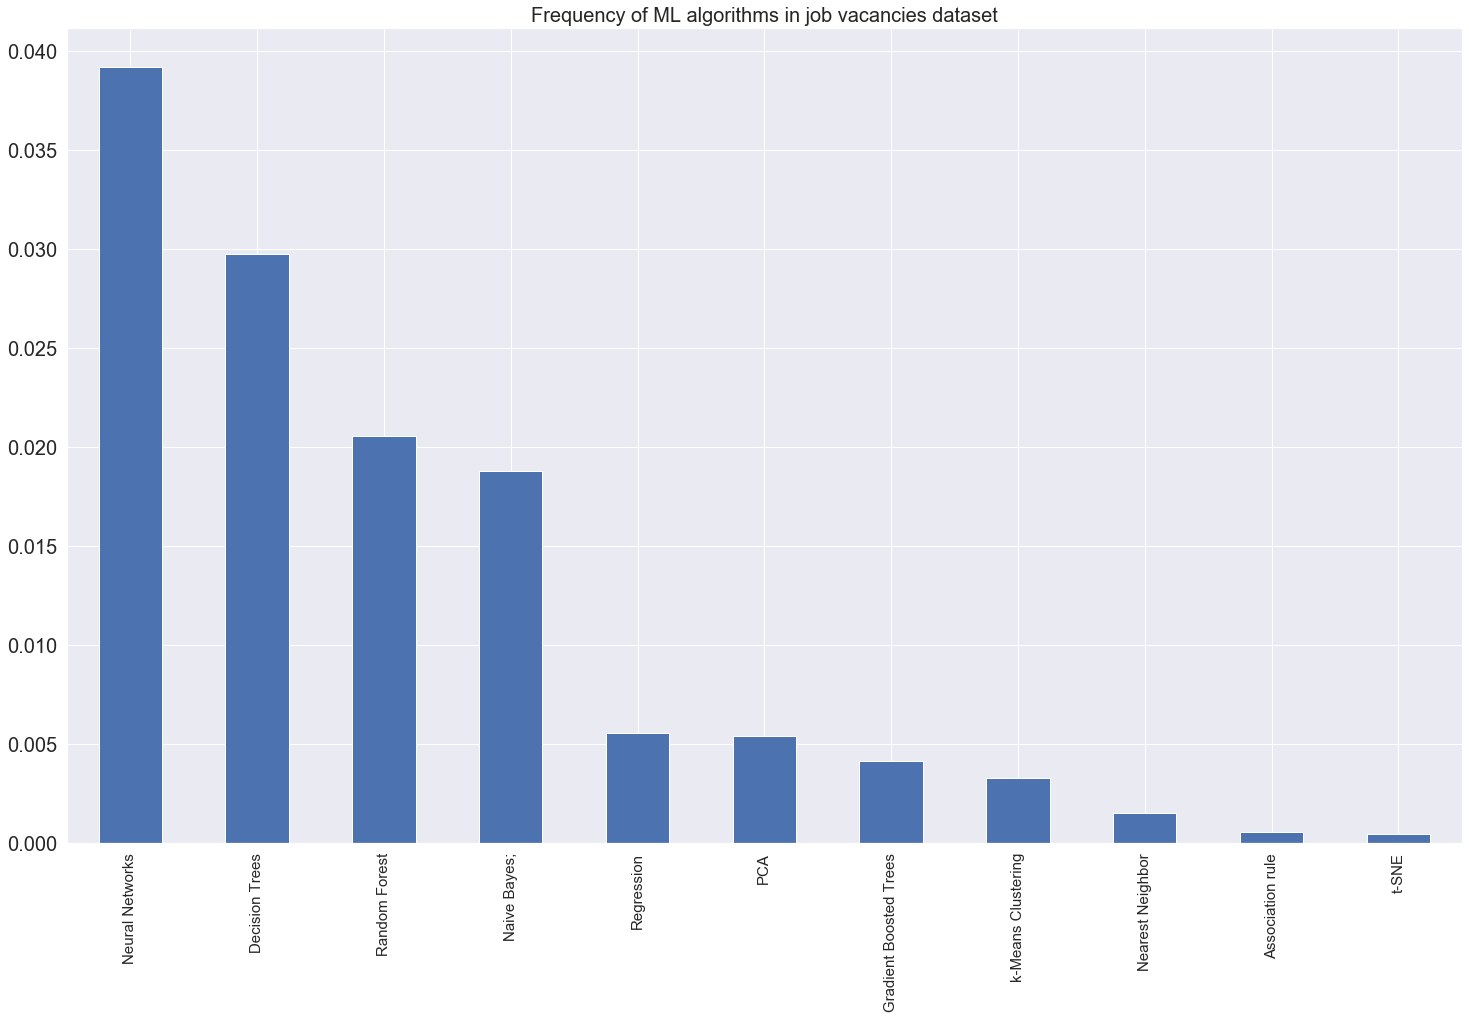

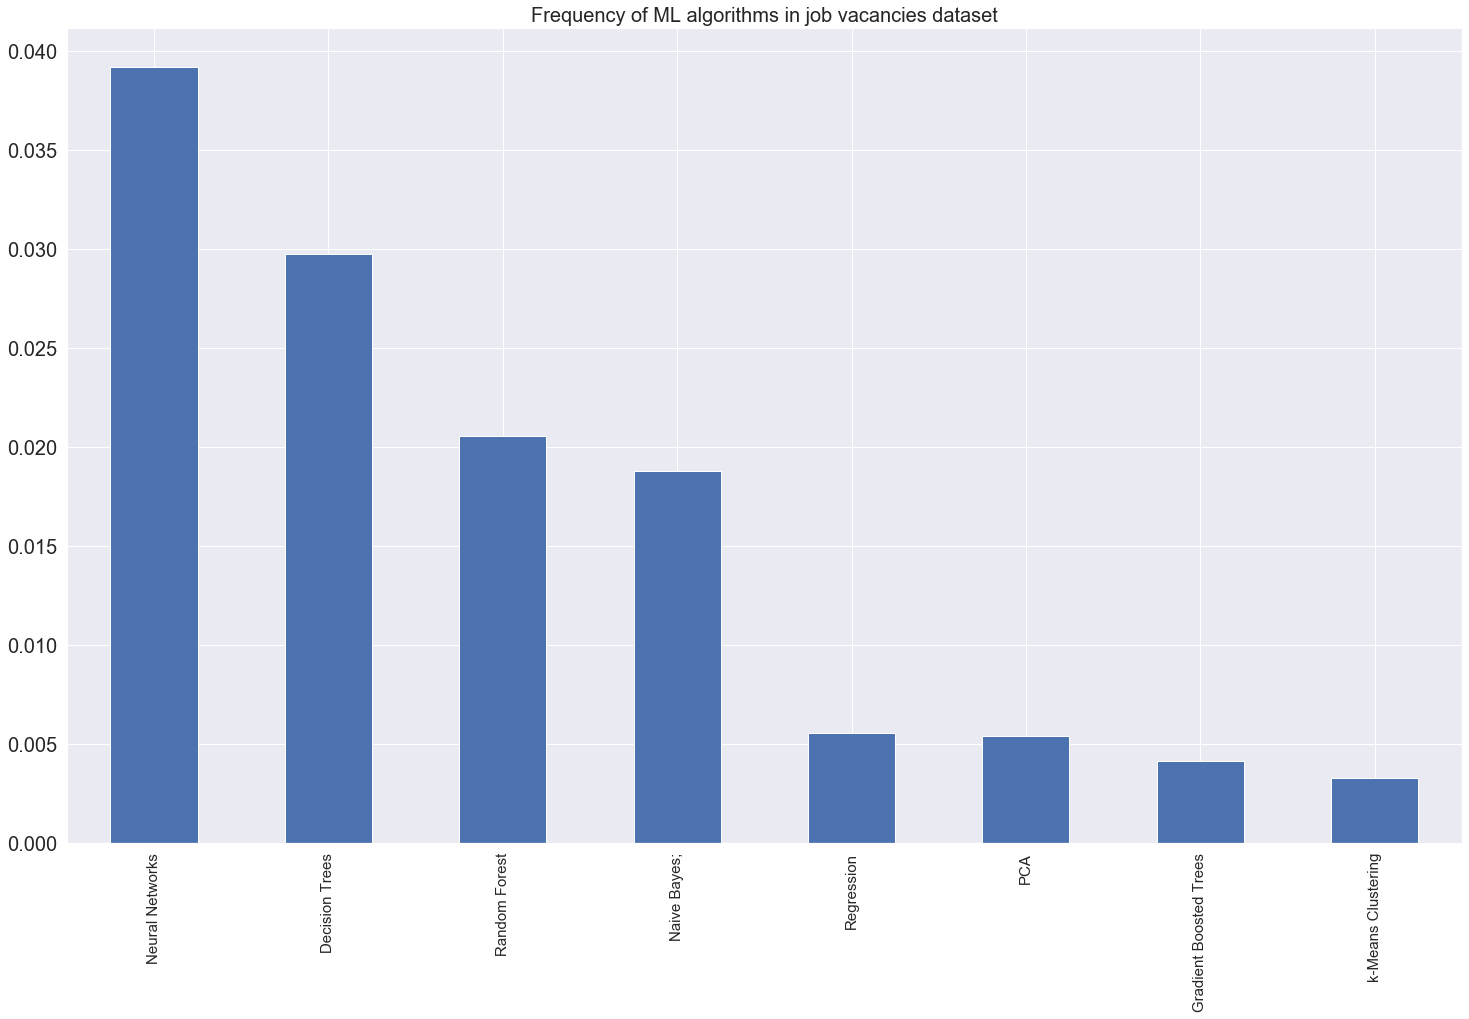

<Figure size 1800x1080 with 0 Axes>

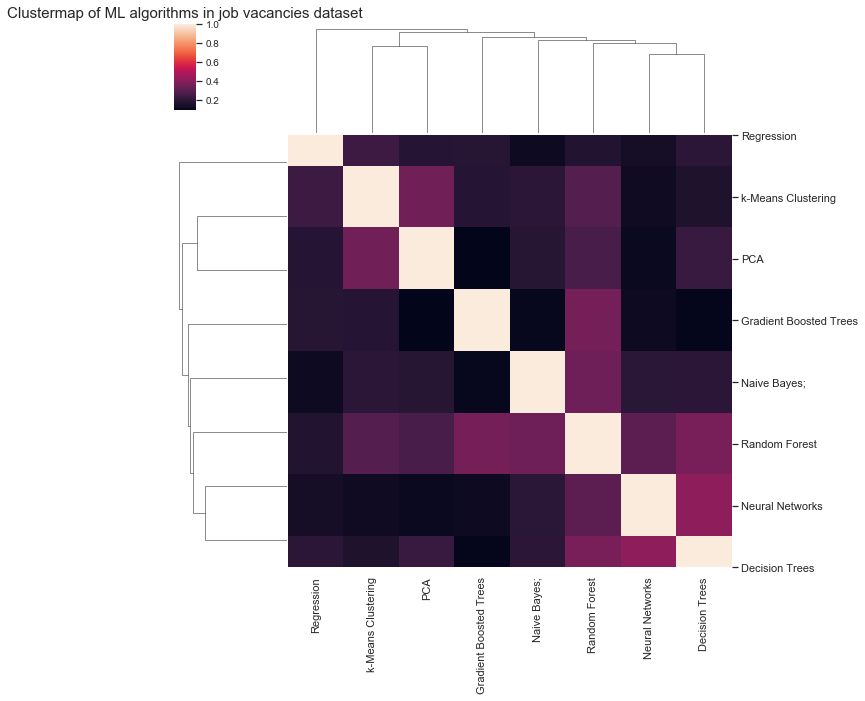

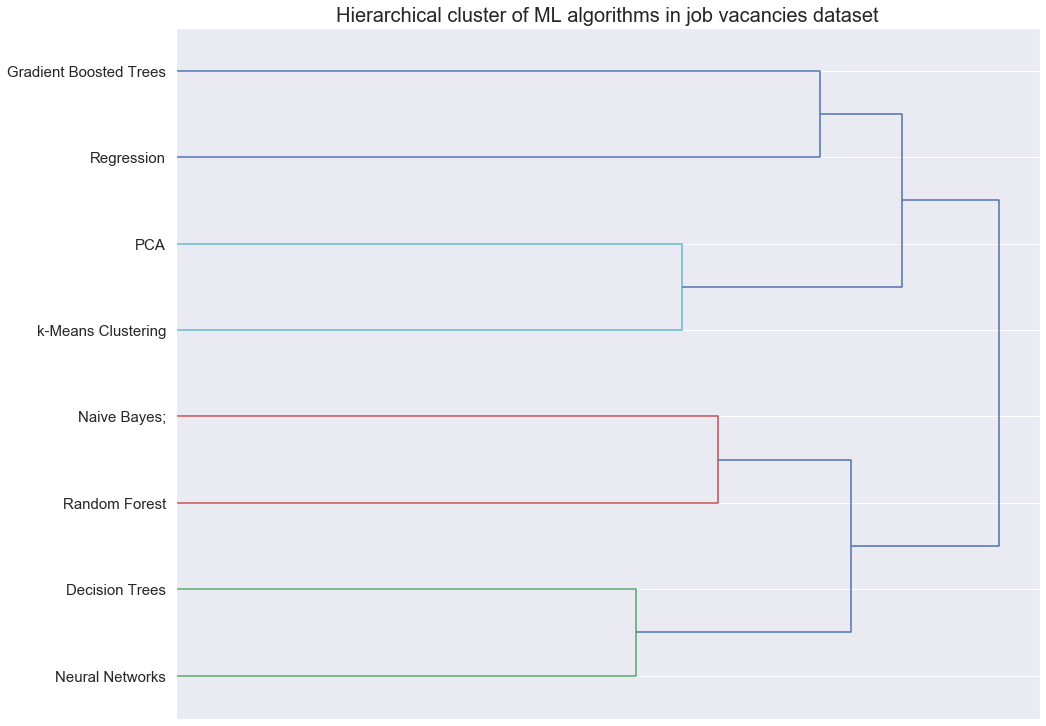

In [82]:
ml_algo_skills=prepare_skills('ML_algo')

ml_algo_res=get_skills(job_ds['Job_Description'], ml_algo_skills)

ml_algo_df = pd.DataFrame(ml_algo_res).apply(pd.to_numeric)

ml_algo_df = ml_algo_df[ml_algo_df.columns[ml_algo_df.sum() != 0]]

ml_algo_reduced_df = ml_algo_df[ml_algo_df.columns[ml_algo_df.mean() > 0.003]]

plt.figure(figsize=(25,15))
ml_algo_df.mean().sort_values(ascending=False).plot.bar()
plt.title('Frequency of ML algorithms in job vacancies dataset', size=20)
plt.xticks(size=15)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(25,15))
ml_algo_reduced_df.mean().sort_values(ascending=False).plot.bar()
plt.title('Frequency of ML algorithms in job vacancies dataset', size=20)
plt.xticks(size=15)
plt.yticks(size=20)
plt.show()

# plt.figure(figsize=(25,15))
# cor = ds_tools_reduced_df.corr() #Calculate the correlation of the above variables
# sns.heatmap(cor, square = True) #Plot the correlation as heat map
# plt.show()

plt.figure(figsize=(25,15))
sns.clustermap(ml_algo_reduced_df.corr(), method="single", robust=True)
plt.title('Clustermap of ML algorithms in job vacancies dataset', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

fig = plt.figure(figsize=(30,16))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])
X=ml_algo_reduced_df.corr()
Z=sch.linkage(X, 'ward')
dend = sch.dendrogram(Z, orientation='right', leaf_font_size=15)
labels = X.index[dend['leaves']]
plt.title('Hierarchical cluster of ML algorithms in job vacancies dataset', size=20)
ax1.set_xticks([])
ax1.set_yticklabels(labels)
plt.show()

From barchart we could easily spot top 5 Machine Learning algorithm with highest demand. Those are:
- Neural Networks;
- Decission Trees;
- Random Forest;
- Naive Bayes;
- Regression.

This result almost coincide with the one from previous analysis. Only Naive Bayes and Random Forest are the ones which did not appear before.

From hierarchical cluster we could derive next clusters.

Cluster 1:
- Gradient Boosted Trees;
- Regression.

Cluster 2:
- PCA;
- k-Means Clustering.

Cluster 3:
- Naive Bayes;
- Random Forest.

Cluster 4:
- Decision Trees;
- Neural Networks.

#### Job vacancies dataset and Math skillset
And as a last step I would like to explorer how frequently there is a demand for mathematical skills and knowledge in the selected dataset for job vacancies. Since overall amount of math skills quite low I will not create neither clustermap nor hierarcical cluster this time.

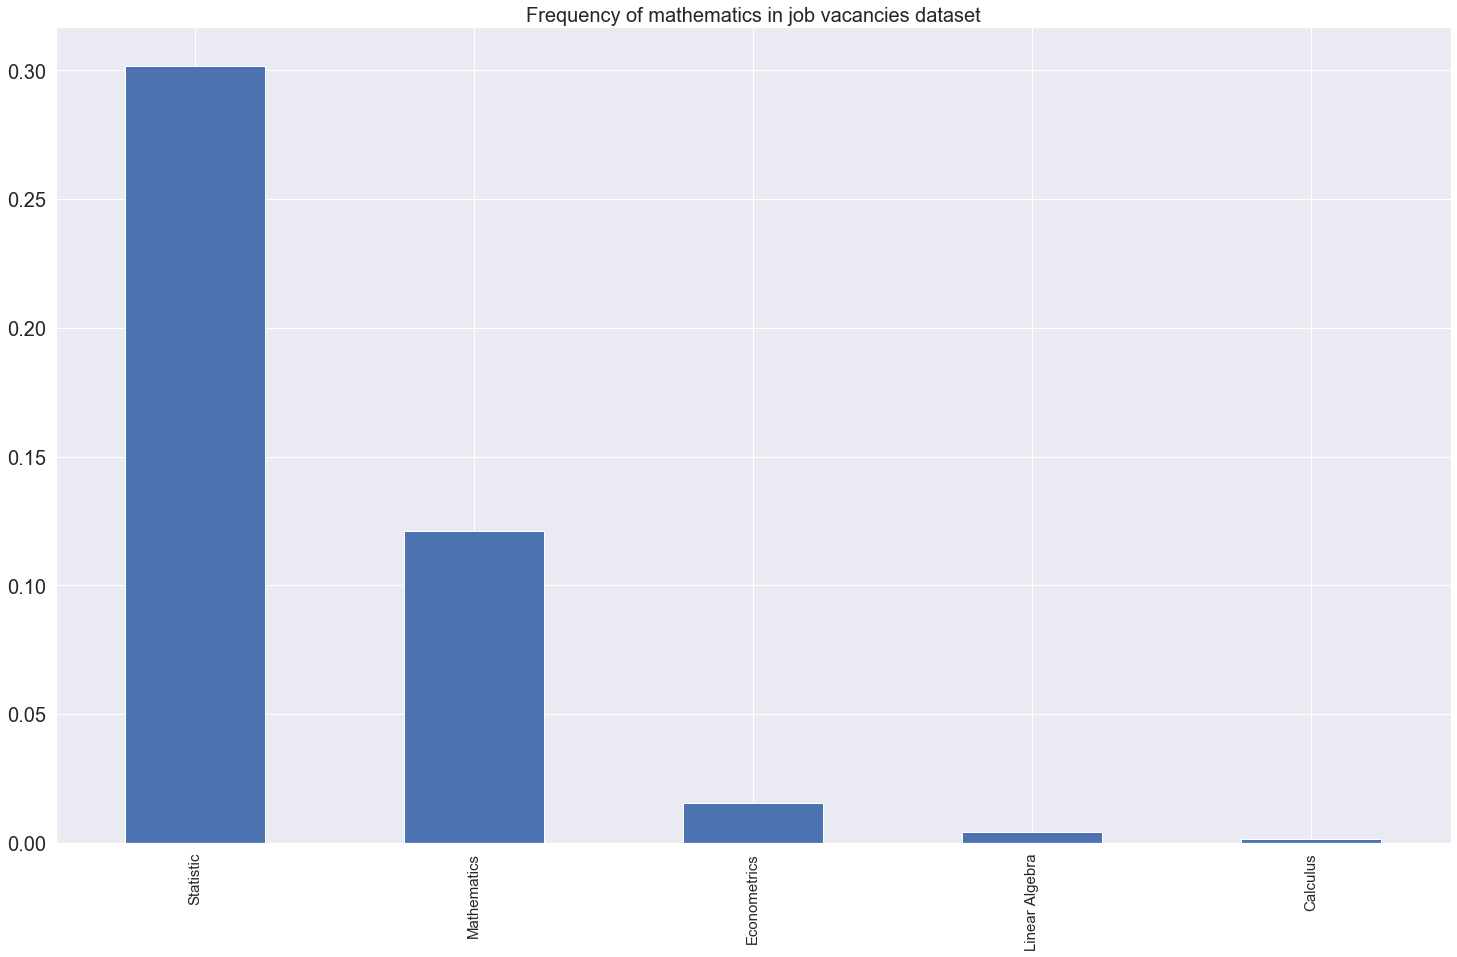

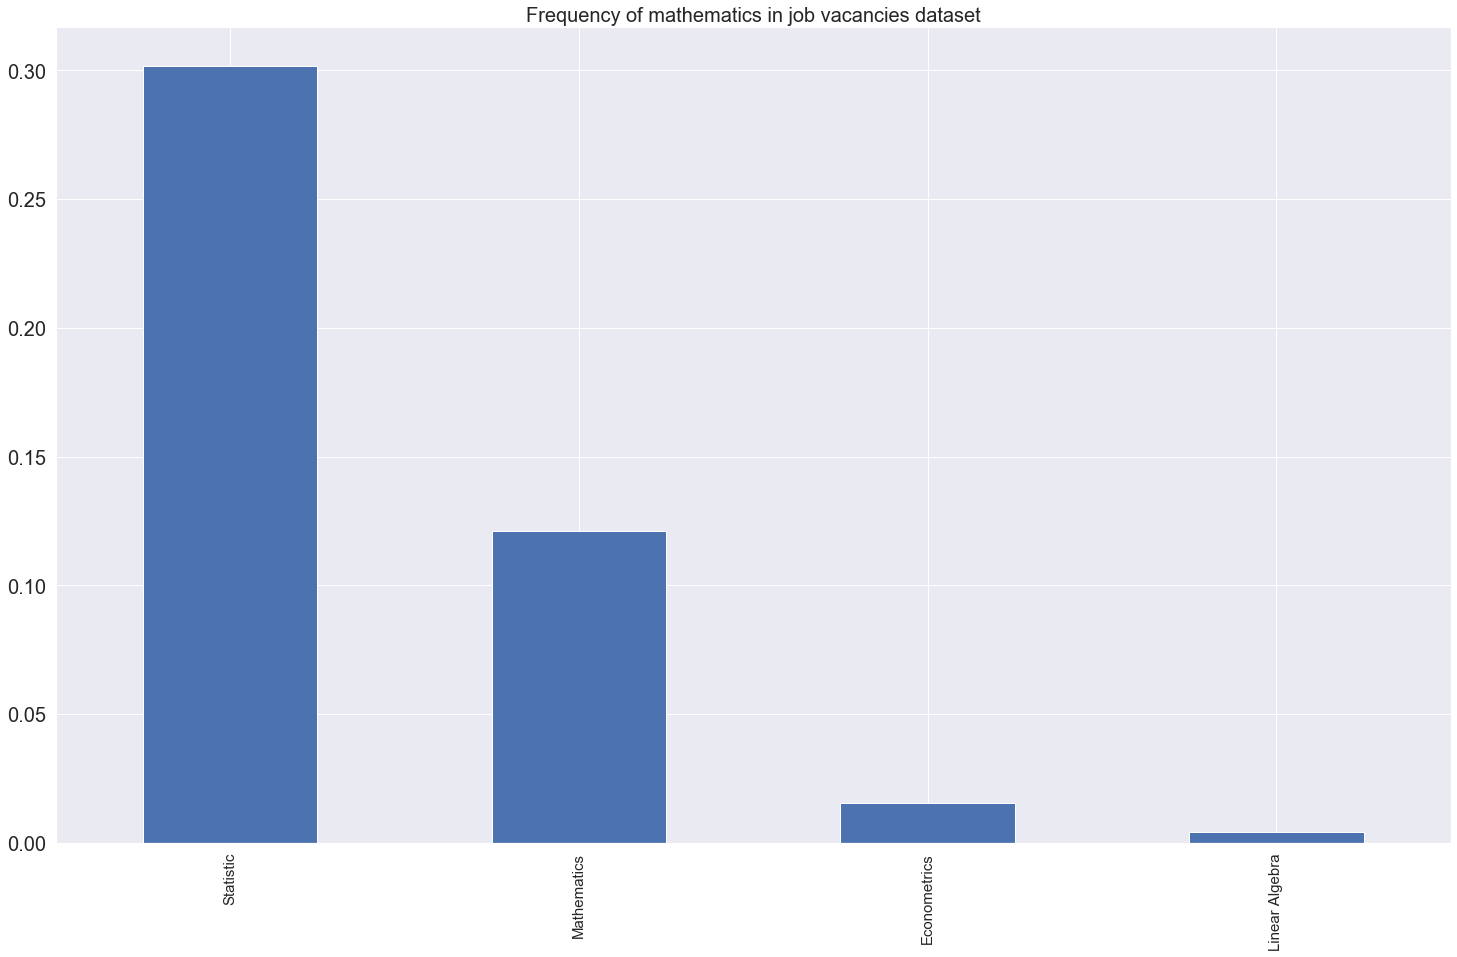

In [83]:
math_skills=prepare_skills('math')

math_res=get_skills(job_ds['Job_Description'], math_skills)

math_df = pd.DataFrame(math_res).apply(pd.to_numeric)

math_df = math_df[math_df.columns[math_df.sum() != 0]]

math_reduced_df = math_df[math_df.columns[math_df.mean() > 0.003]]

plt.figure(figsize=(25,15))
math_df.mean().sort_values(ascending=False).plot.bar()
plt.title('Frequency of mathematics in job vacancies dataset', size=20)
plt.xticks(size=15)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(25,15))
math_reduced_df.mean().sort_values(ascending=False).plot.bar()
plt.title('Frequency of mathematics in job vacancies dataset', size=20)
plt.xticks(size=15)
plt.yticks(size=20)
plt.show()

From bar chart we could see that highest demand exist for Statistic knowledge - around 30% of vacancies has statistics requirements. In gneral Mathematic is required for 12% of job vacancies. Other skills are  required quite rarely.

### Conclusions:
Based on mine exploratory analysis of USA job vacancies and location independent set of online courses I could suggest following changes to curriculum of Master of Data Science program:
- Most demanding soft skills based on my analisys are Communications, Teamwork, Leadership, Work Ethic and Problem-Solving skills. As per hierarchical cluster I have built for job vacancies and soft skills those are also required together with each other. Hence I would recommend to include in the program curriculum some events which could develop such skills. This includes but not limited to Team Challenges, Hackathons, Presentations and Public Speaking events. This will better prepare students for possible requirements when seeking for job.
- Among Data Science tools, which are not yet added to the program, there is high demand for TensorFlow framework. Considering outcome of hierarchical cluster I have created for usage analysis of Data Science tools together with TensorFlow usually there is demand for Keras and PyTorch frameworks as well. Those are all frameworks used for Deep Learning. Which also coincides with results I have got in part 1 about course curriculum - that there is high demand for Deepl Learning skillset.
- Analysis of mathematical skills did not discover anything new - Statistic currently has highest demand.
- Speaking about Machine Learning algorithm analysis - currently highest demand exist for those algorithms which belongs to Supervised Machine Learning. Only few algorithms appears in data analysis for Unsupervised Machine Learning and no frequency for Reinforcement Machine Learning. Hence, despite rising interest to Reinforcement learning it looks like currently it does not have big demand and won't benefits student, as per analysis of current data. In a nutshell, algorithms for Supervised and Unsupervised Machine Learning are mostly spread nowadays algorithms and studying those in a separate course definetly will bring value and give students competitive advantage on job market.

To cross validate my conclusion I would liek to refer to KDnuggets survey results which are published in this article - https://www.kdnuggets.com/2019/09/core-hot-data-science-skills.html. As per results of this survey most wanted Data Science skills are Deep Learning, TensorFlow, Python, Apache Spark, PyTorch, Statistics and big data tools. Such results are compeltely inline with the one I was able to retrieve from colelcted data. 

Based on this article and ther results, I could conclude that mine results, recieved during research, are correct and corresponds to current job market situation.

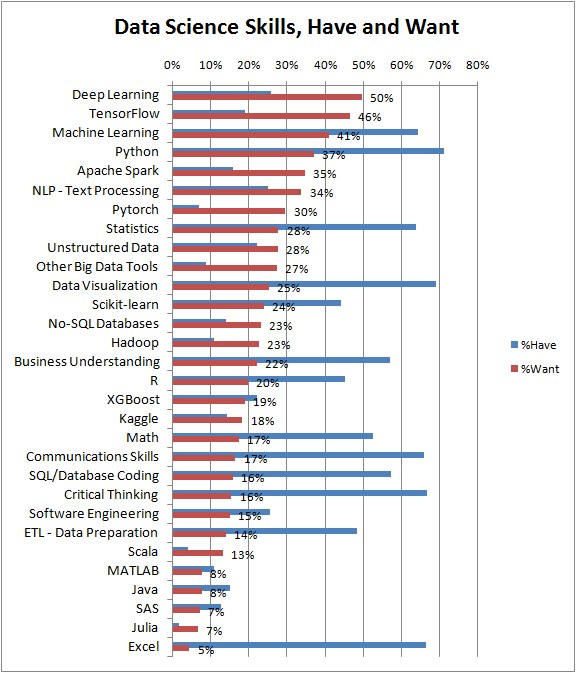